# Before you begin

## Update your course repository

You need to clone the course repository to Nova. You probably already have cloned this, so you can skip this step.

```bash
git clone git@github.com:EEOB-BioData/BCB546_Spring2024.git
```

You will still need to pull new changes to this repository at the beginning of class. This will enable you to access new data files and scripts needed for in-class activities.

```bash
cd BCB546_Spring2024
git pull
```

Note that if you have modified any files in the repository, you will need to commit those changes before you can pull new changes. If you don't care about the changes, just delete and re-clone the repository.

## Start Jupyter notebook on Nova on demand.

You can start Jupyter notebook on Nova on demand. This will allow you to run Jupyter notebook on the server and access it from your local machine.

1. Go to the [Nova OnDemand](https://nova-ondemand.its.iastate.edu/) and login
2. Under the "Interactive Apps" tab, click on "Jupyter Notebook", request desired resources and click "Launch"
3. Wait for the job to start and click on the "Connect to Jupyter" button



# Getting Started

To begin, we need to import the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

We will need `pandas` for data manipulation, `matplotlib` for plot customization, `seaborn` for plotting, and `numpy` for some additional calculations.


# Load the data

For this example, we will use DESeq2 results from a differential expression analysis. 
Briefly, this dataset compares knockout and wildtype samples for a specific gene in rats (_Rattus norvegicus_). The study aims to find the role of the knocked out gene in rat development.

The results compare 5 replicates each of WT and KO samples.

In [3]:
filepath = 'DESeq2results-KOvsWT.tsv'
deseq = pd.read_csv(filepath, sep='\t')

First, examine data structure and contents.

In [4]:
deseq.head()

Gene     baseMean  log2FoldChange     lfcSE       stat  \
0  ENSRNOG00000037919  6952.475728       -2.343605  0.088174 -26.579187   
1  ENSRNOG00000001184   305.779107        3.612207  0.157760  22.896820   
2  ENSRNOG00000009705  1348.738194        1.756749  0.081295  21.609479   
3  ENSRNOG00000009713   431.315577        2.316639  0.122126  18.969304   
4  ENSRNOG00000009837  2594.133564        0.811993  0.044927  18.073766   

          pvalue           padj         KO.1          WT.1         KO.2  \
0  1.181477e-155  1.922854e-151  2696.887991  11195.129292  2336.830978   
1  4.997783e-116  4.066946e-112   669.184555     41.007800   533.823820   
2  1.462887e-103  7.936164e-100  2315.102825    620.975251  2162.822108   
3   3.059300e-80   1.244753e-76   659.639925    145.480051   794.345574   
4   5.129044e-73   1.669504e-69  3374.556660   1755.524374  3204.909124   

           WT.2         KO.3          WT.3         KO.4          WT.4  \
0  10734.956976  2134.972578  12024.073700  2051.509072  10584.363782   
1     36.277561   503.359284     51.908451   644.242299     39.978711   
2    639.125259  1874.684176    621.863249  1787.772381    581.357092   
3    113.100630   751.494143    156.763523   583.844584    136.593930   
4   1814.945017  3394.889982   1913.345521  3335.967157   1938.134602   

          KO.5          WT.5  external_gene_name    gene_biotype  \
0  2223.502095  13542.530813  ENSRNOG00000037919  protein_coding   
1   475.882437     62.126154              Pknox1  protein_coding   
2  2266.300944    617.378654                 Lck  protein_coding   
3   802.987924    168.905481               Oxa1l  protein_coding   
4  3219.084839   1989.978365            Tmem131l  protein_coding   

                                         description  
0                                                NaN  
1  PBX/knotted 1 homeobox 1 [Source:RGD Symbol;Ac...  
2  LCK proto-oncogene, Src family tyrosine kinase...  
3  OXA1L, mitochondrial inner membrane protein [S...  
4  transmembrane 131 like [Source:RGD Symbol;Acc:...

The data contains the following columns (standard  DESeq2 output):

- `Gene`: gene name
- `baseMean`: average of normalized counts
- `log2FoldChange`: log2 fold change
- `lfcSE`: standard error of log2 fold change
- `stat`: Wald statistic
- `pvalue`: p-value
- `padj`: adjusted p-value

plus, additional columns:

- `KO.1` to `KO.5` and `WT.1` to`WT.5`: normalized counts for each sample (5xWT, 5xKO)
- `external_gene_name` : gene name
- `gene_biotype`: gene biotype
- `description`: gene description


We will also exampine data columns information.


In [5]:
deseq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17650 entries, 0 to 17649
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gene                17650 non-null  object 
 1   baseMean            17650 non-null  float64
 2   log2FoldChange      17650 non-null  float64
 3   lfcSE               17650 non-null  float64
 4   stat                17650 non-null  float64
 5   pvalue              17644 non-null  float64
 6   padj                16275 non-null  float64
 7   KO.1                17650 non-null  float64
 8   WT.1                17650 non-null  float64
 9   KO.2                17650 non-null  float64
 10  WT.2                17650 non-null  float64
 11  KO.3                17650 non-null  float64
 12  WT.3                17650 non-null  float64
 13  KO.4                17650 non-null  float64
 14  WT.4                17650 non-null  float64
 15  KO.5                17650 non-null  float64
 16  WT.5

# Basic plotting

## Create a volcano plot

A volcano plot is a scatter plot that shows the relationship between fold change and statistical significance.
To plot, we use fold change as x-axis, and adjusted p-value as y. 

Text(0, 0.5, 'Adjusted p-value')

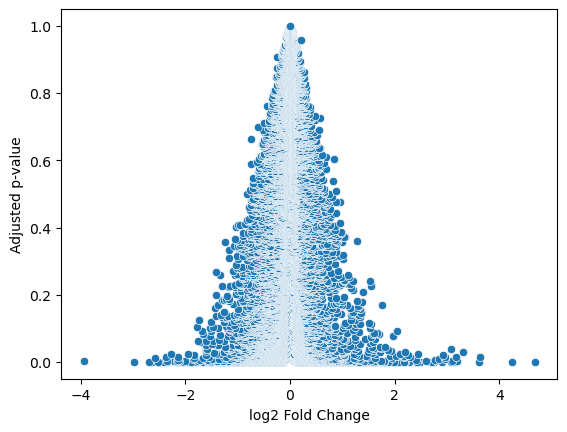

In [6]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='padj')
plt.xlabel('log2 Fold Change')
plt.ylabel('Adjusted p-value')

However, this does not look like a typical volcano plot. 

All the genes that we care about (i.e, significant), are in the narrrow slice range of y-axis (0 to 0.05), and the ones that we don't care occupy most of the plot. Hence, it is a common practice to transform the p-value to -log10(p-value) and expand the region that we care.

So we will add another column to the data frame with -log10(p-value) and use that for plotting.

In [7]:
deseq['negLog10.padj'] = -np.log10(deseq['padj'])

Also, We may have to adjust the plot size and resolution:

In [20]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['figure.dpi'] = 300

We can redo the scatter plot (aka. volcano plot) with -log10(p-value) for y and fold change for x.

Text(0, 0.5, '-log10 Adjusted p-value')

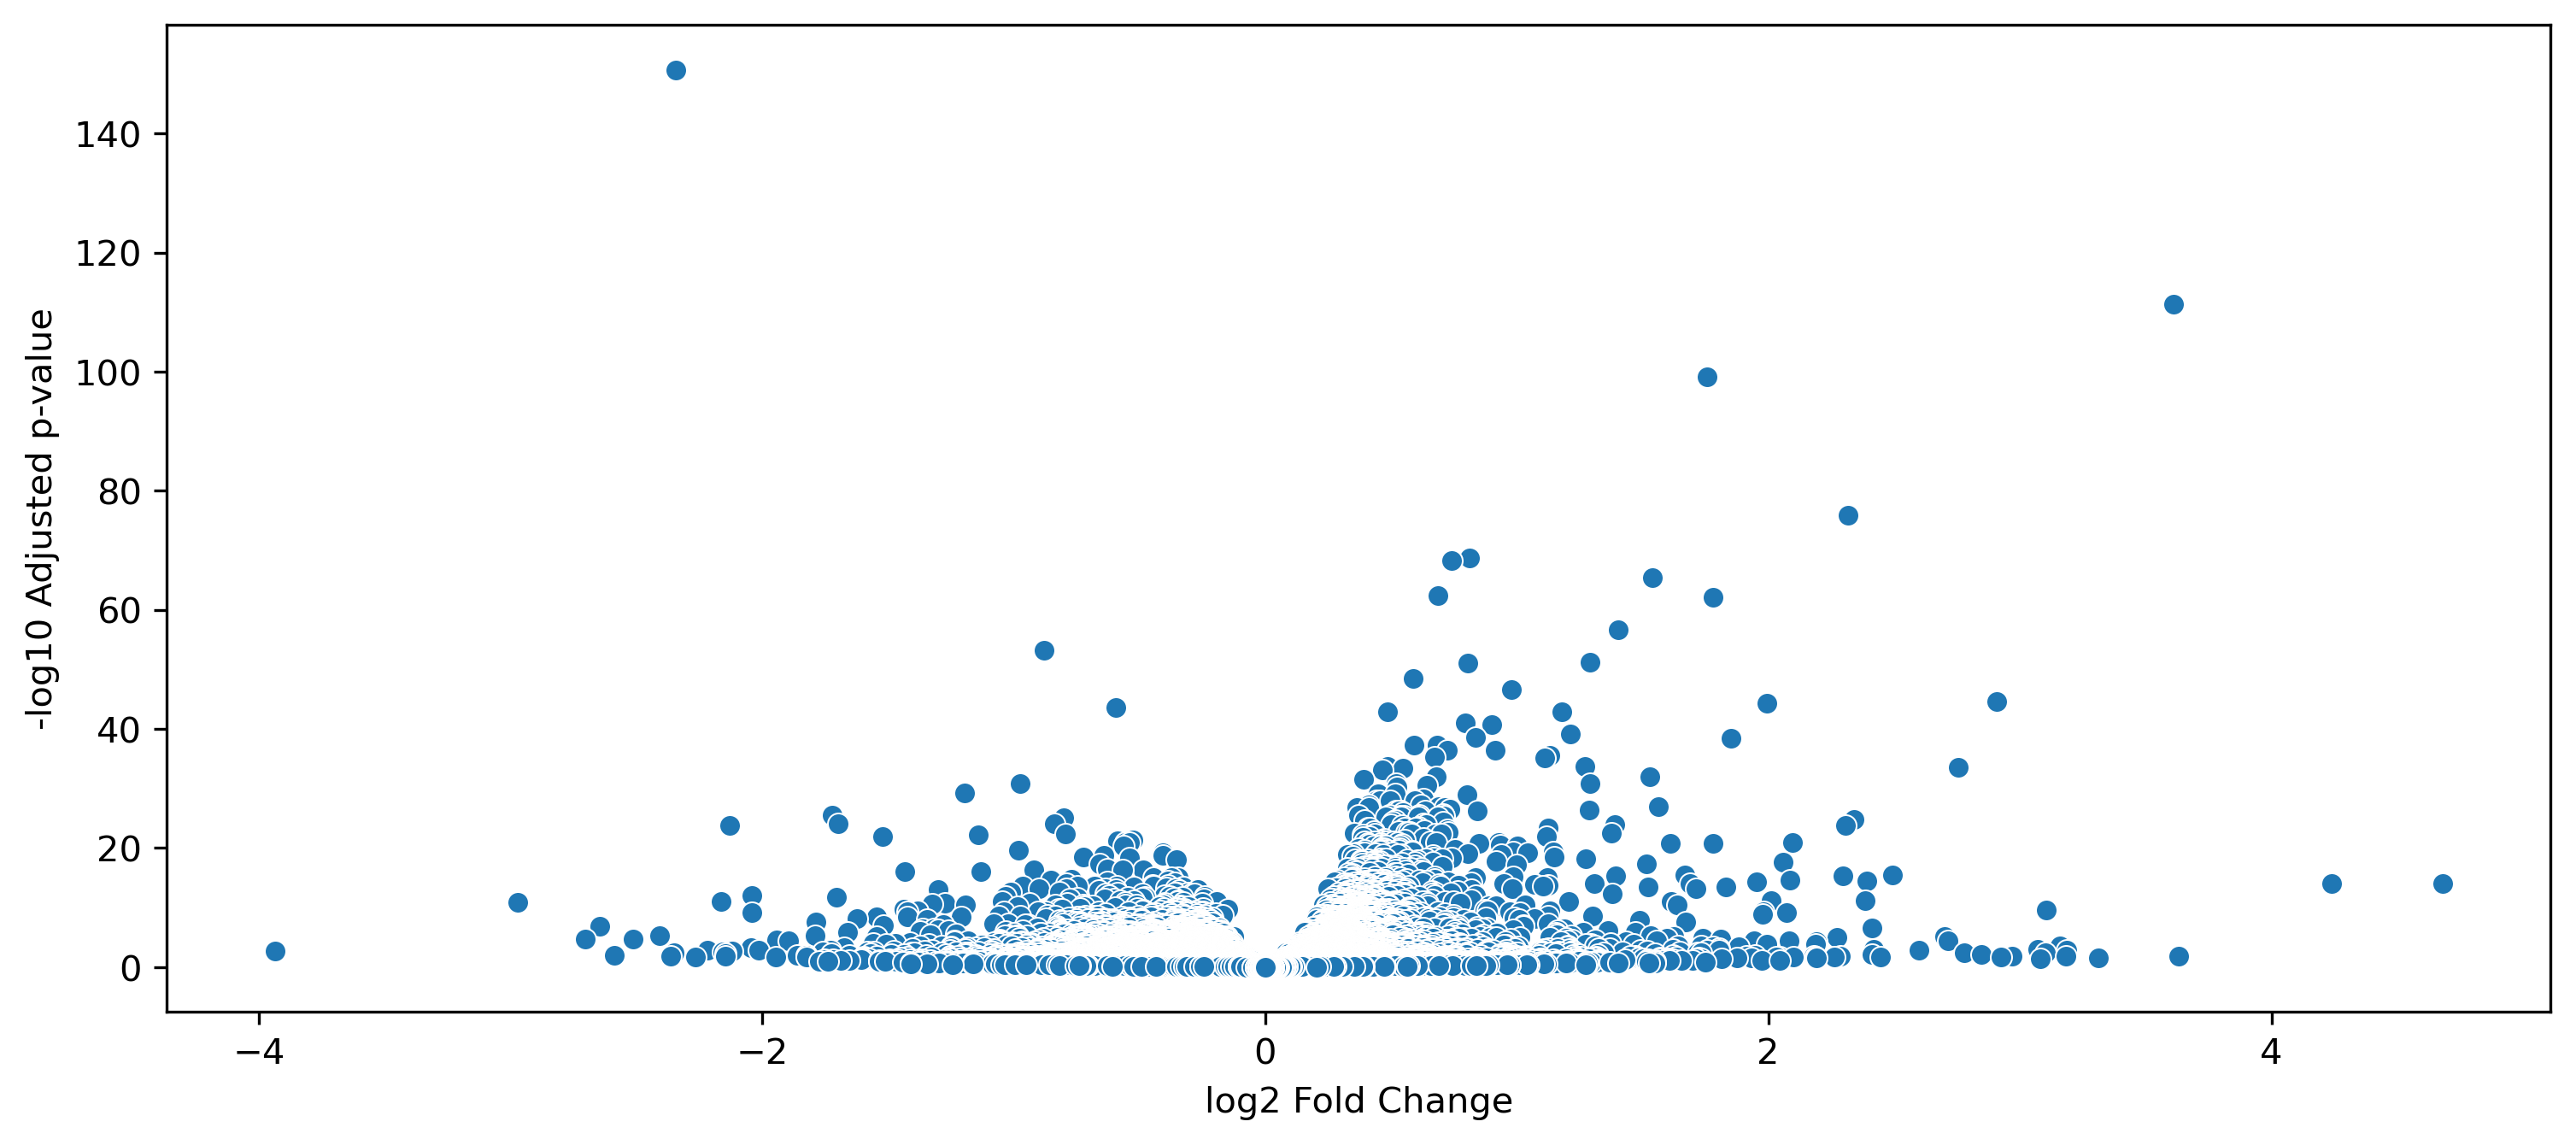

In [21]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='negLog10.padj')
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')

This looks like a typical volcano plot.
It is easier to see genes that are significant (adj.pvalue < 0.05 or -log10(p-value) > 1.3) along with their log2 fold change.  

Next, we will color them based on upregulated or downregulated genes. For this, we will create filters and apply them to create a column that can be used for `hue` in the `scatterplot`.

In [22]:
upFilter = (deseq['log2FoldChange'] > 1.5) & (deseq['padj'] <= 0.05)
downFilter = (deseq['log2FoldChange'] < -1.5) & (deseq['padj'] <= 0.05)

Now, we will create a new column `regulation` and assign values based on the filters.

In [23]:
deseq['regulation'] = 'NS'
deseq.loc[upFilter, 'regulation'] = 'up-regulated'
deseq.loc[downFilter, 'regulation'] = 'down-regulated'

Now, we can use this column for `hue` in the `scatterplot`.

Text(0, 0.5, '-log10 Adjusted p-value')

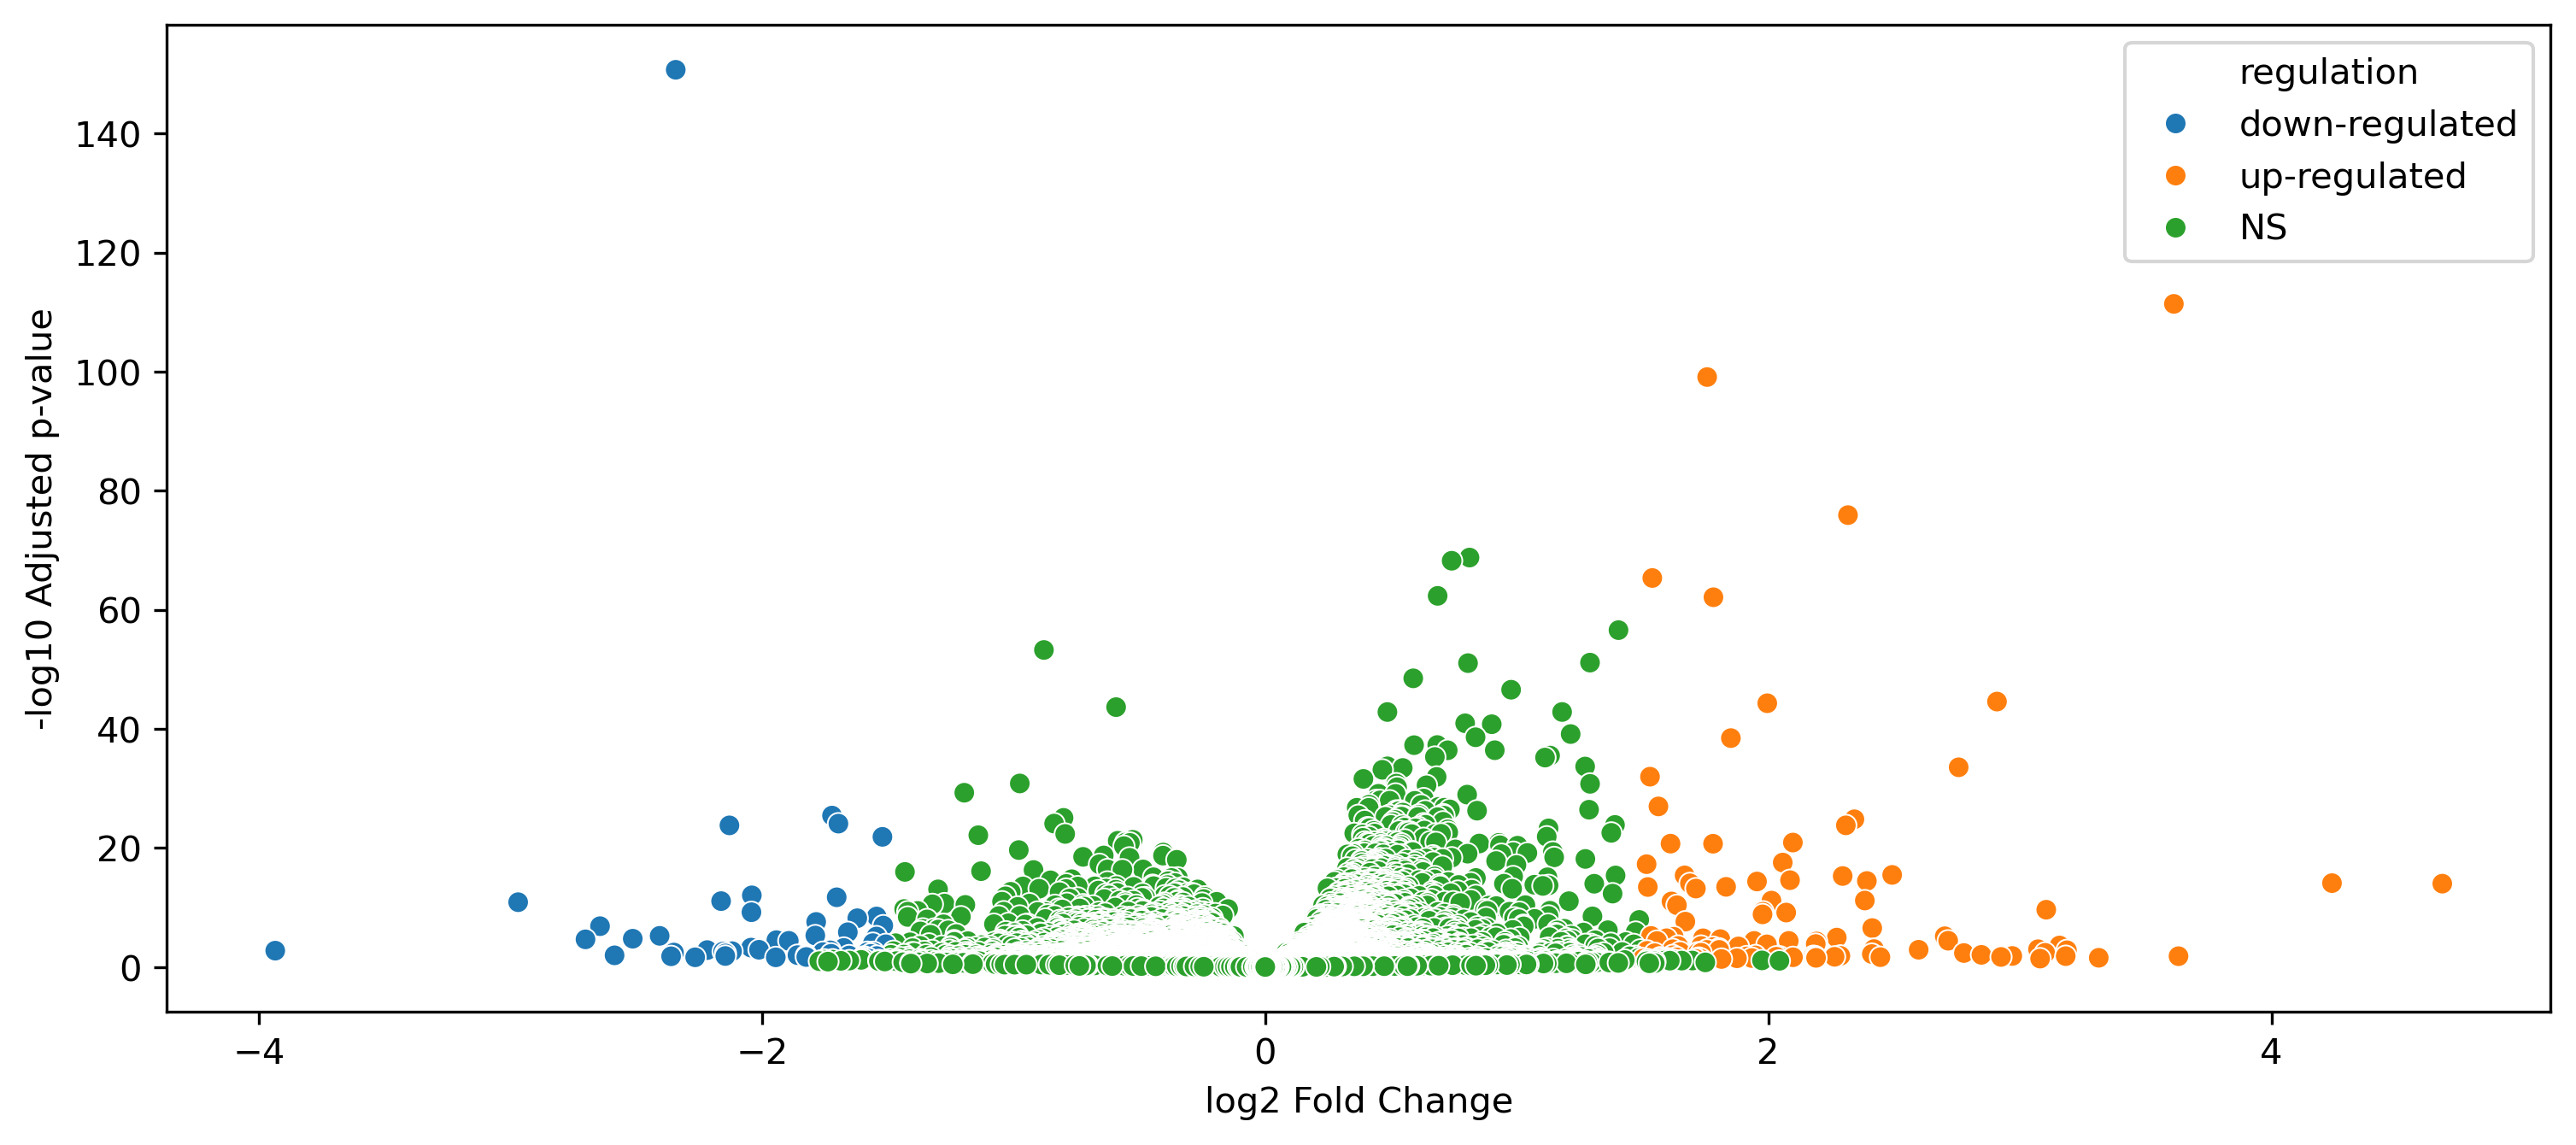

In [24]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='negLog10.padj', hue='regulation')
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')

Typically, overexpressed genes are colored in red, and underexpressed genes are colored in green. The genes that are not significantly differentially expressed are colored in grey (convention used since microarray days).


Let's redo the plot with a different color palette.

Text(0, 0.5, '-log10 Adjusted p-value')

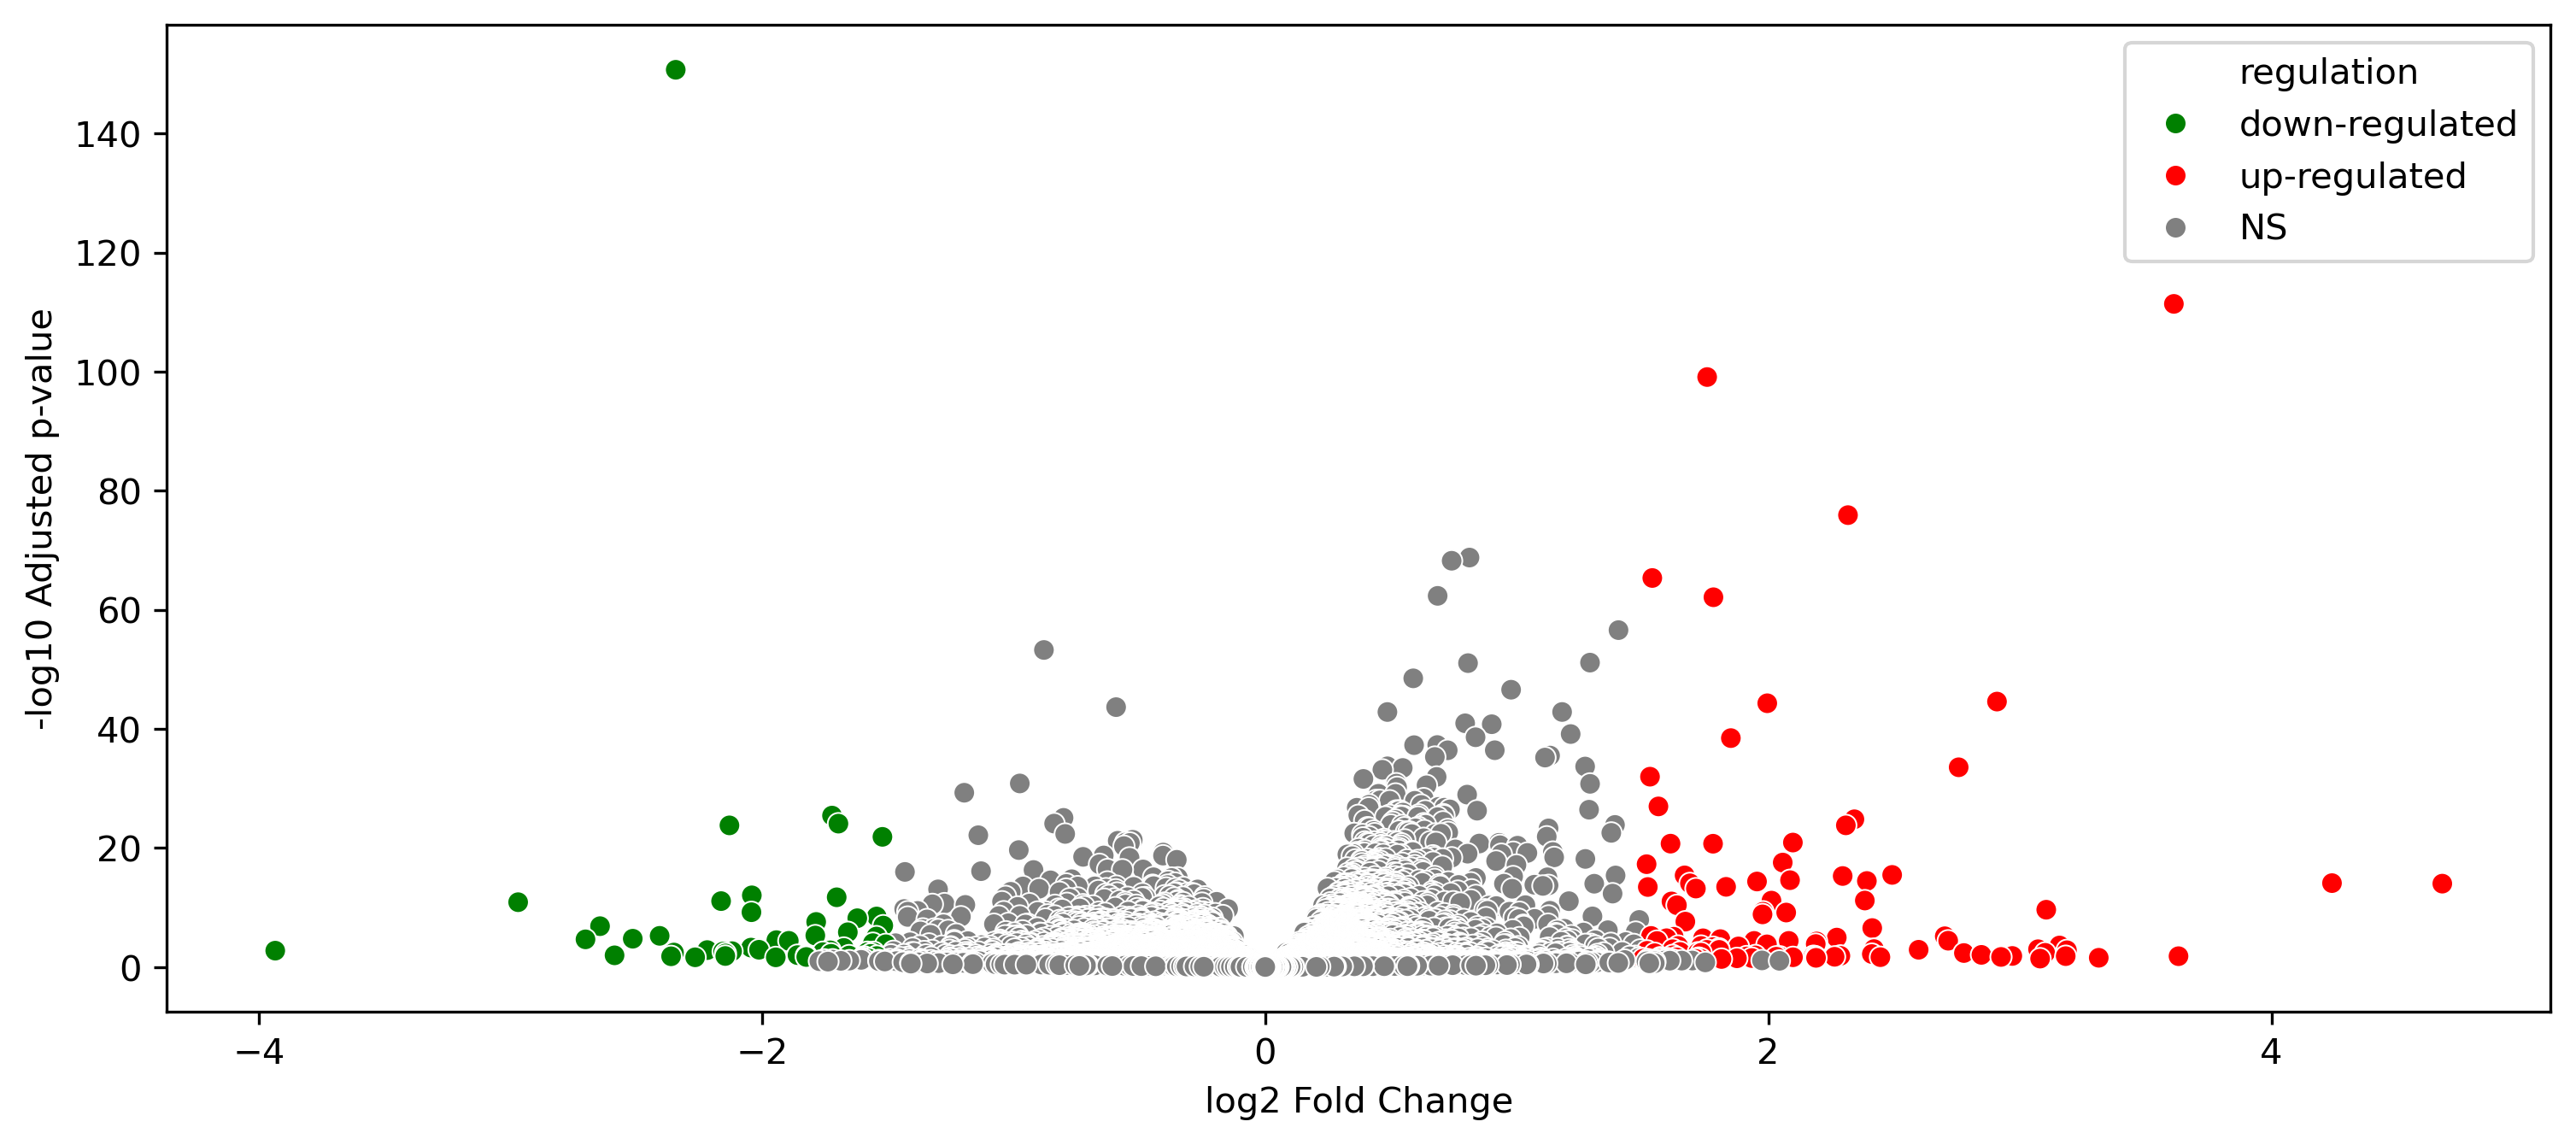

In [25]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='negLog10.padj', hue='regulation', palette=['green','red', 'grey'])
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')

If you want to draw lines separating the borders, you can use the `axhline` and `axvline` functions.

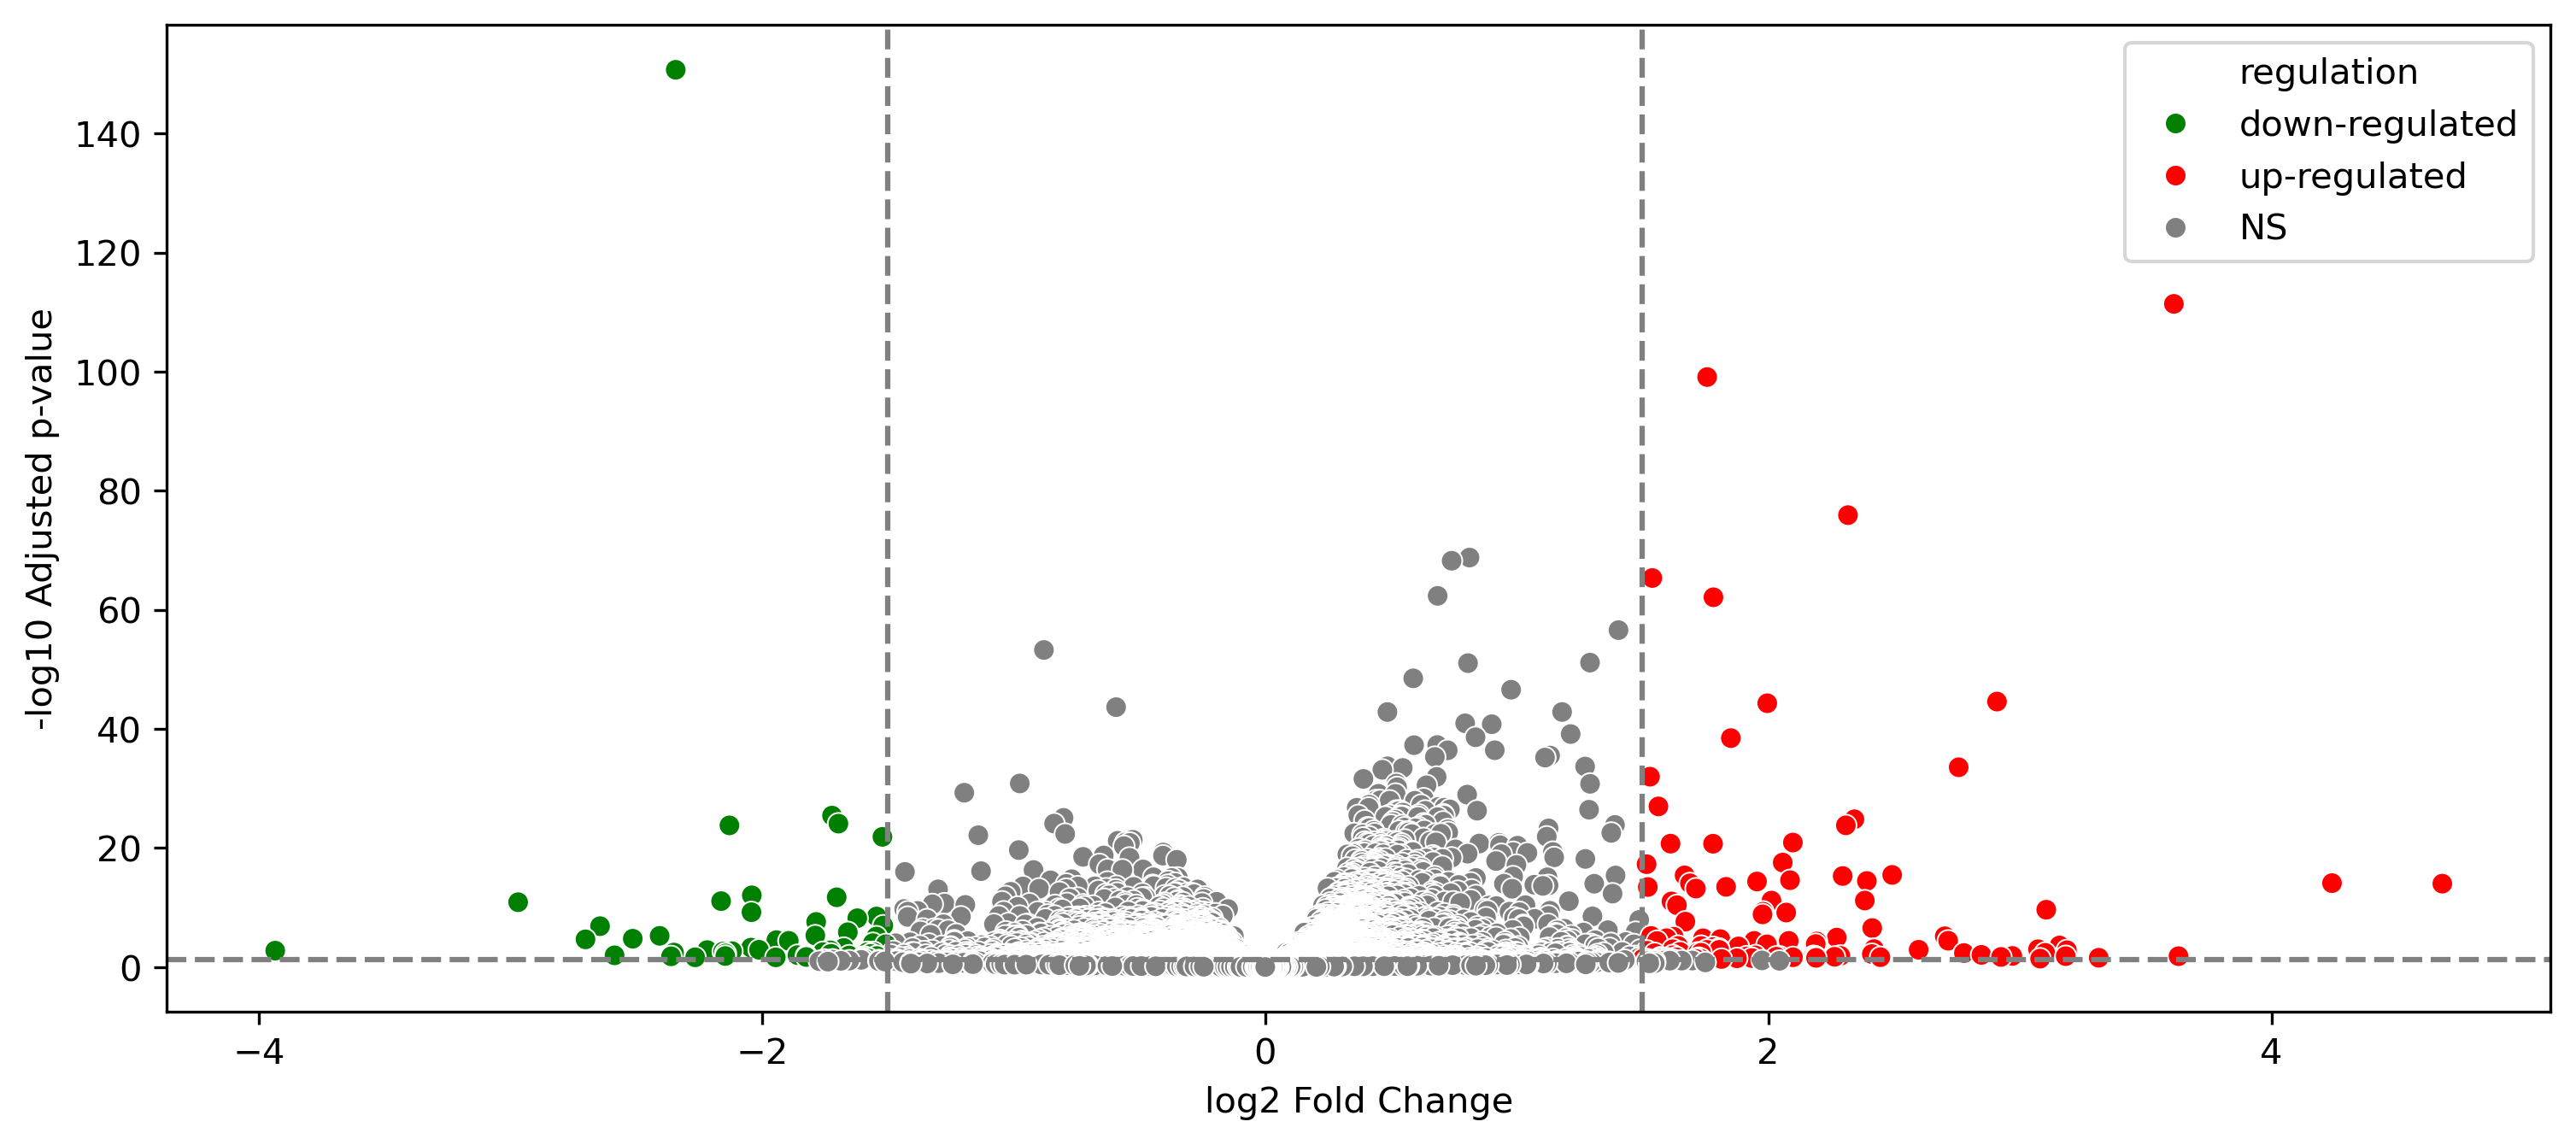

In [26]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='negLog10.padj', hue='regulation', palette=['green','red', 'grey'])
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')
plt.axvline(-1.5,color="grey",linestyle="--")
plt.axvline(1.5,color="grey",linestyle="--")
plt.axhline(-np.log10(0.05),color="grey",linestyle="--")

If you want to move the legend outside the plot, you can use the `bbox_to_anchor` argument in the `legend` function.

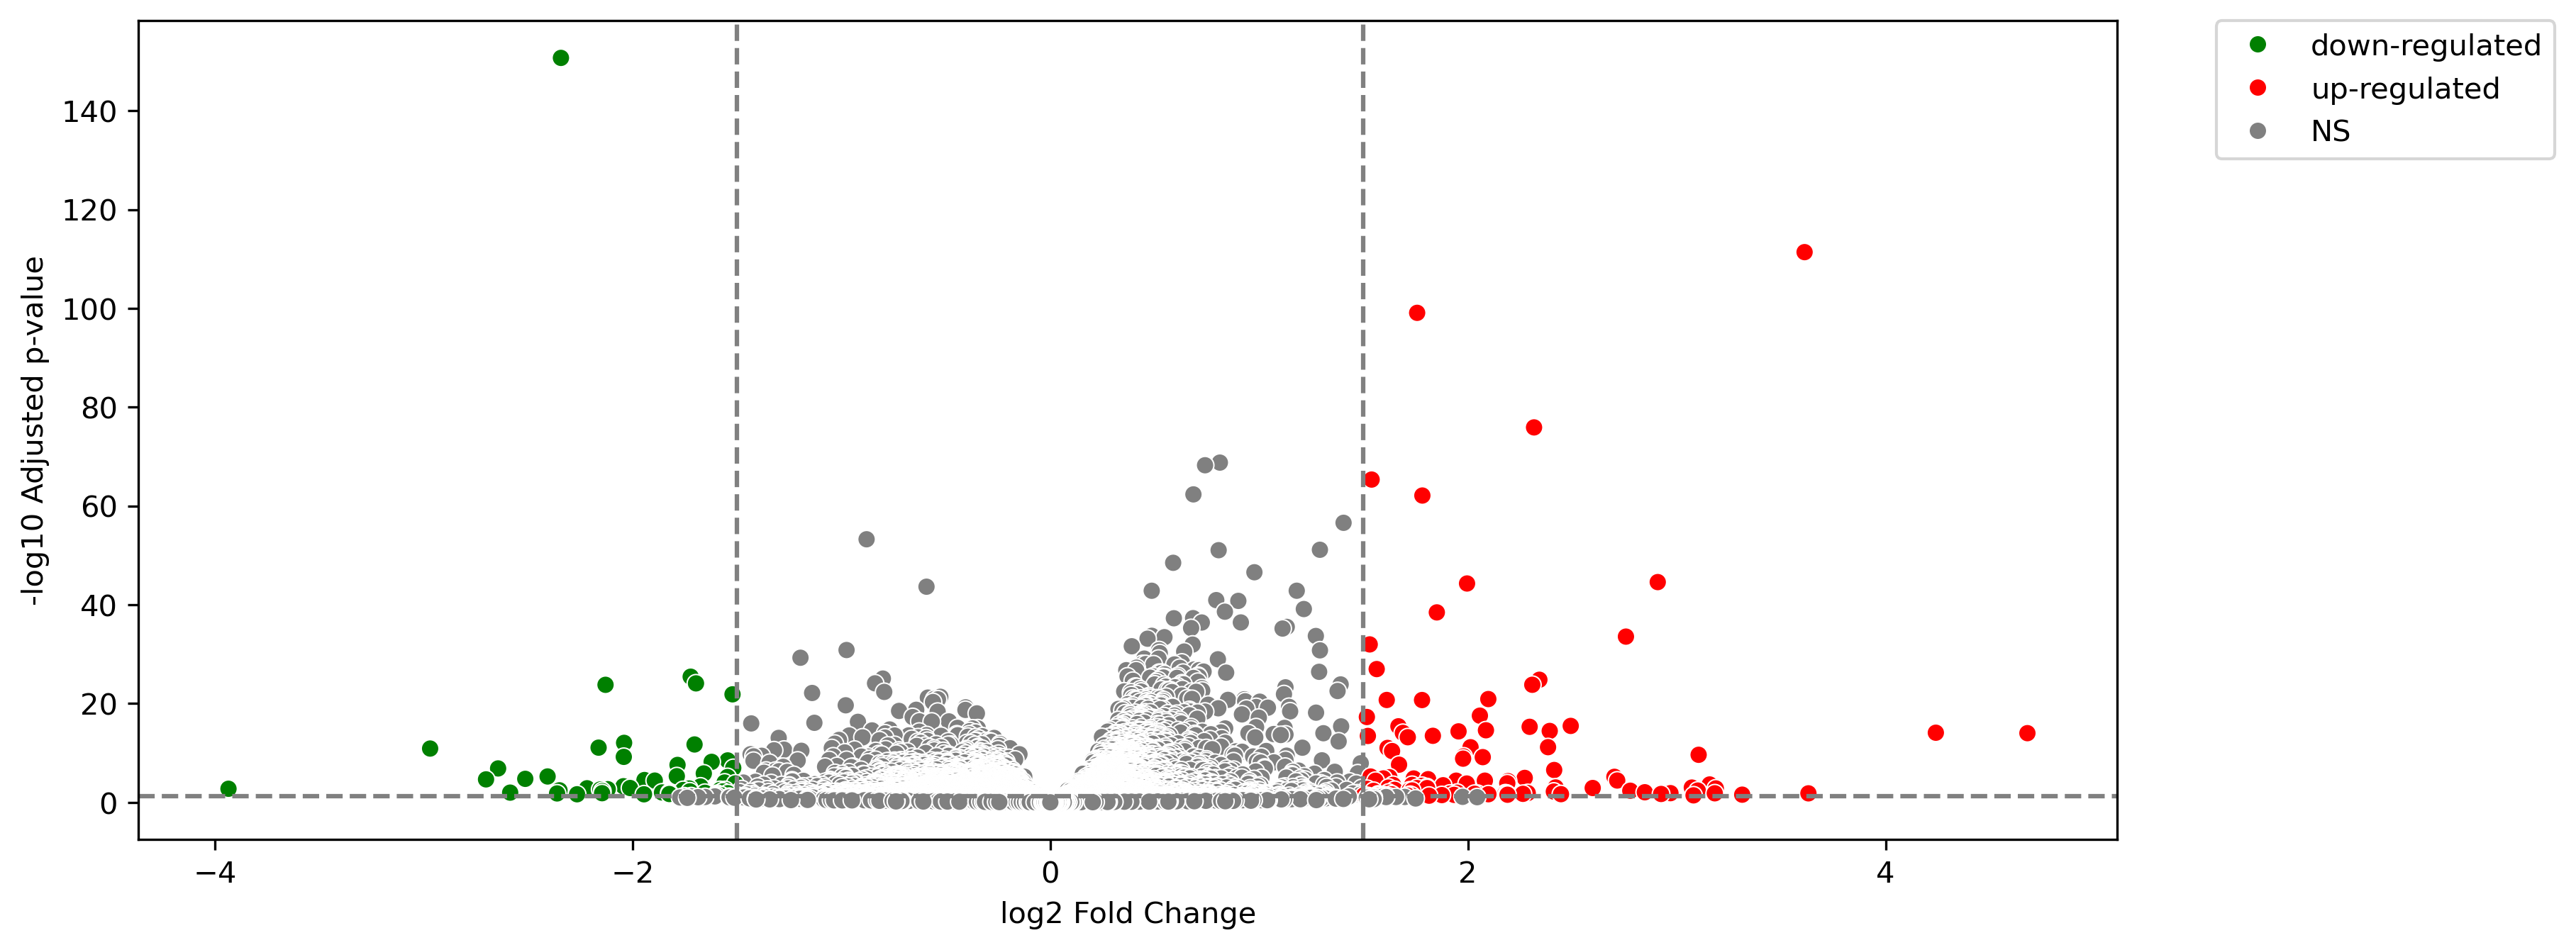

In [27]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='negLog10.padj', hue='regulation', palette=['green','red', 'grey'])
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')
plt.axvline(-1.5,color="grey",linestyle="--")
plt.axvline(1.5,color="grey",linestyle="--")
plt.axhline(-np.log10(0.05),color="grey",linestyle="--")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

you can also swap `sns.relplot` in place of `sns.scatterplot` to get similar results.

You might also want to label the points with gene names. You can use the `text` function to do this.
For this, we will create another column with gene names and use it to label the points.
We will only use top 5 significant genes for this example.

In [28]:
topUp = deseq.loc[upFilter].nlargest(10, 'log2FoldChange')
topDown = deseq.loc[downFilter].nsmallest(10, 'log2FoldChange')

Now, we can use the `text` function to label the points.

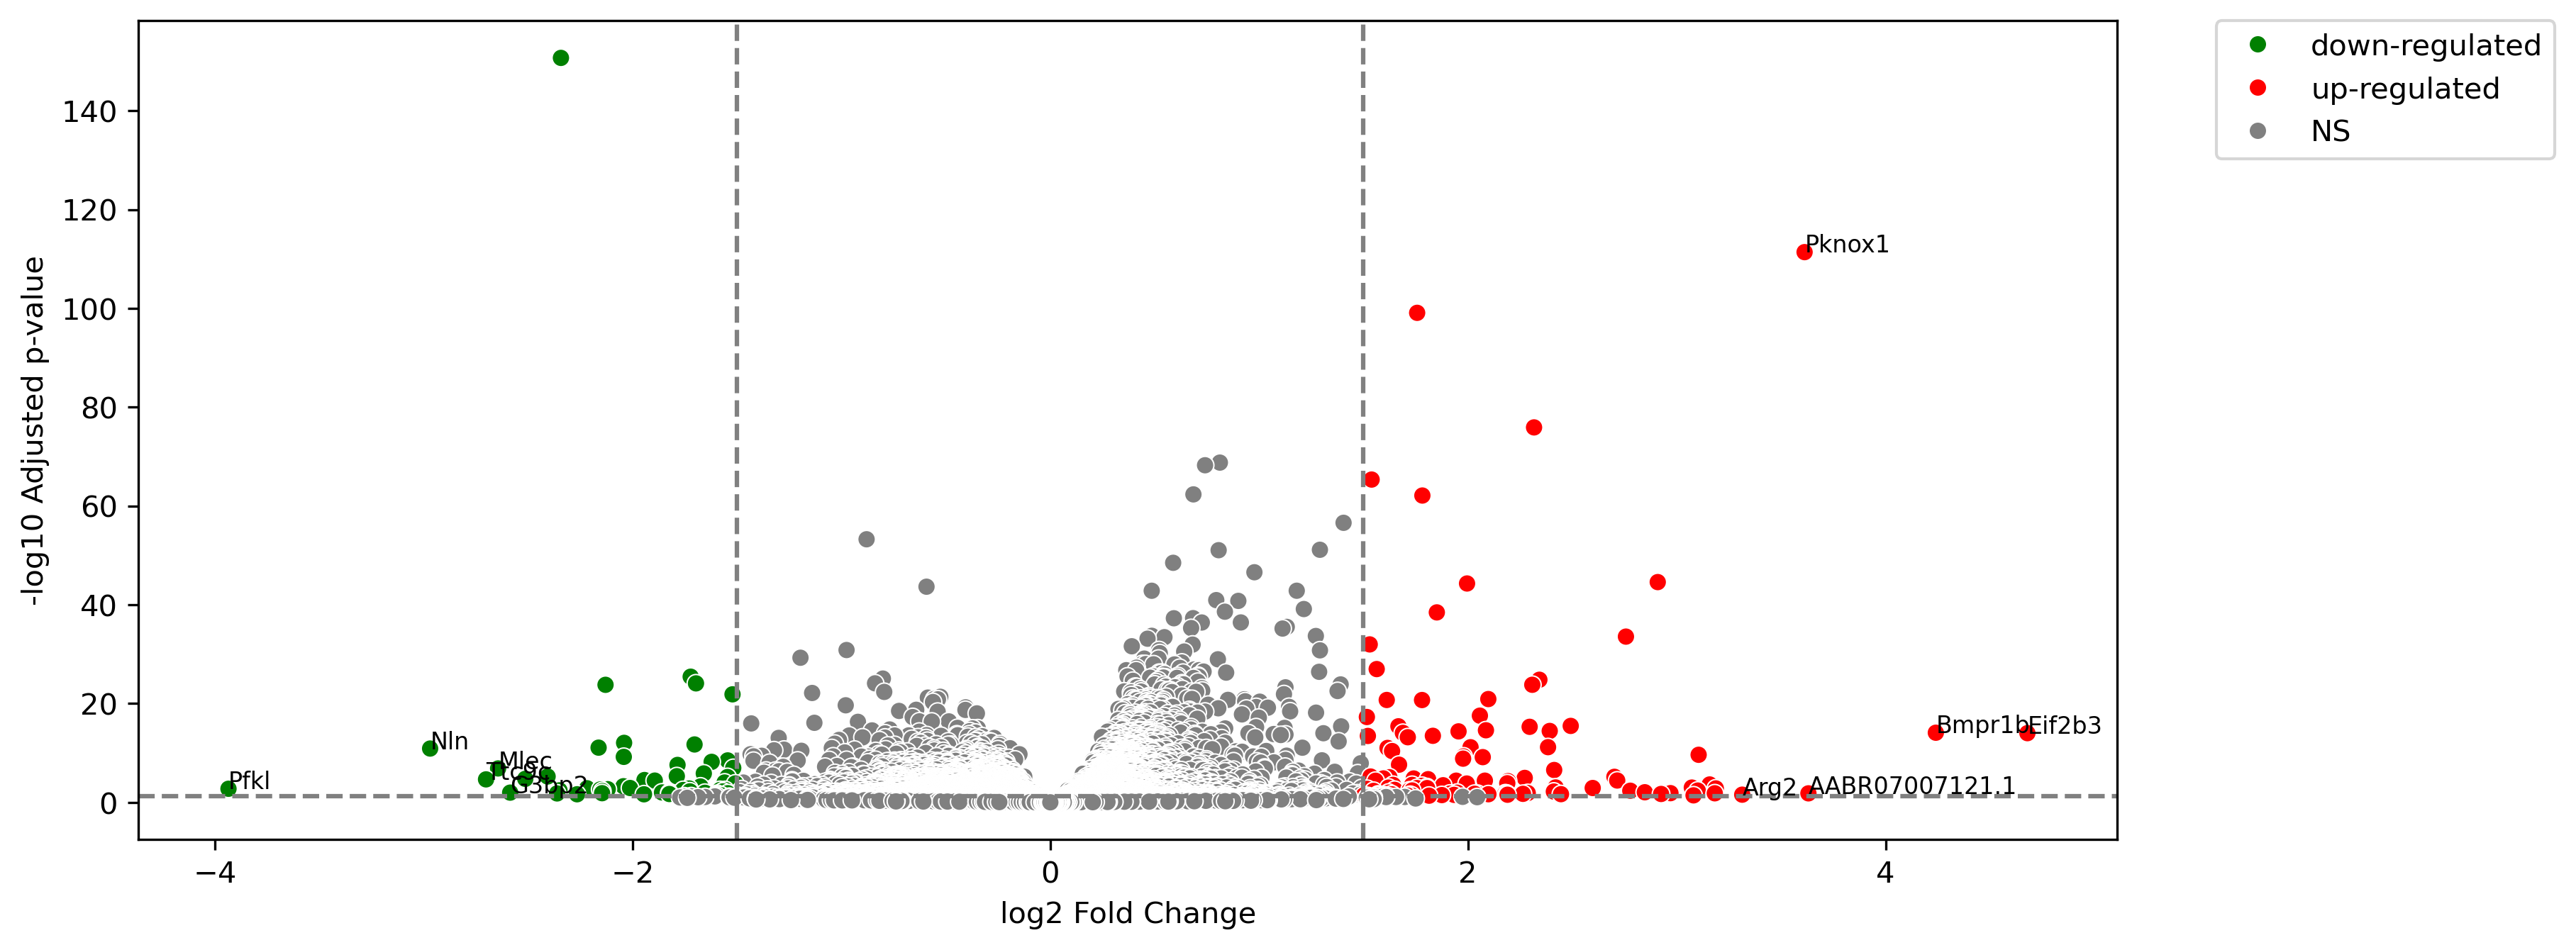

In [29]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='negLog10.padj', hue='regulation', palette=['green','red', 'grey'])
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')
plt.axvline(-1.5,color="grey",linestyle="--")
plt.axvline(1.5,color="grey",linestyle="--")
plt.axhline(-np.log10(0.05),color="grey",linestyle="--")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for i in range(5):
    plt.text(topUp['log2FoldChange'].iloc[i], topUp['negLog10.padj'].iloc[i], topUp['external_gene_name'].iloc[i], fontsize=8)
    plt.text(topDown['log2FoldChange'].iloc[i], topDown['negLog10.padj'].iloc[i], topDown['external_gene_name'].iloc[i], fontsize=8)

Additional customization can be done, but we will stop here and save the plot.

In [30]:
plt.savefig('volcano_plot.png')

<Figure size 3600x1500 with 0 Axes>

## Create a heatmap

Heatmaps are a great way to visualize the expression of genes across samples.

For this example, we will use the normalized counts for the top 10 differentially expressed genes from the above table. We will use the same filters we created earlier.

In [31]:
topUp = deseq.loc[upFilter].nlargest(10, 'log2FoldChange')
topDown = deseq.loc[downFilter].nsmallest(10, 'log2FoldChange')

To merge these 2 dataframes:

In [32]:
heatmapData = pd.concat([topUp, topDown])

Now, we will select only the columns we need for the heatmap.

In [33]:
heatmapData = heatmapData[['external_gene_name', 'KO.1', 'KO.2', 'KO.3', 'KO.4', 'KO.5', 'WT.1', 'WT.2', 'WT.3', 'WT.4', 'WT.5']]

Looks like there is one `NaN` value in the data. We will exclude that row.

In [34]:
heatmapData = heatmapData.dropna()

We can reindex the data frame for the gene column

In [35]:
heatmapData = heatmapData.set_index('external_gene_name')

Now, we will use the `heatmap` function to plot the heatmap.

<Axes: ylabel='external_gene_name'>

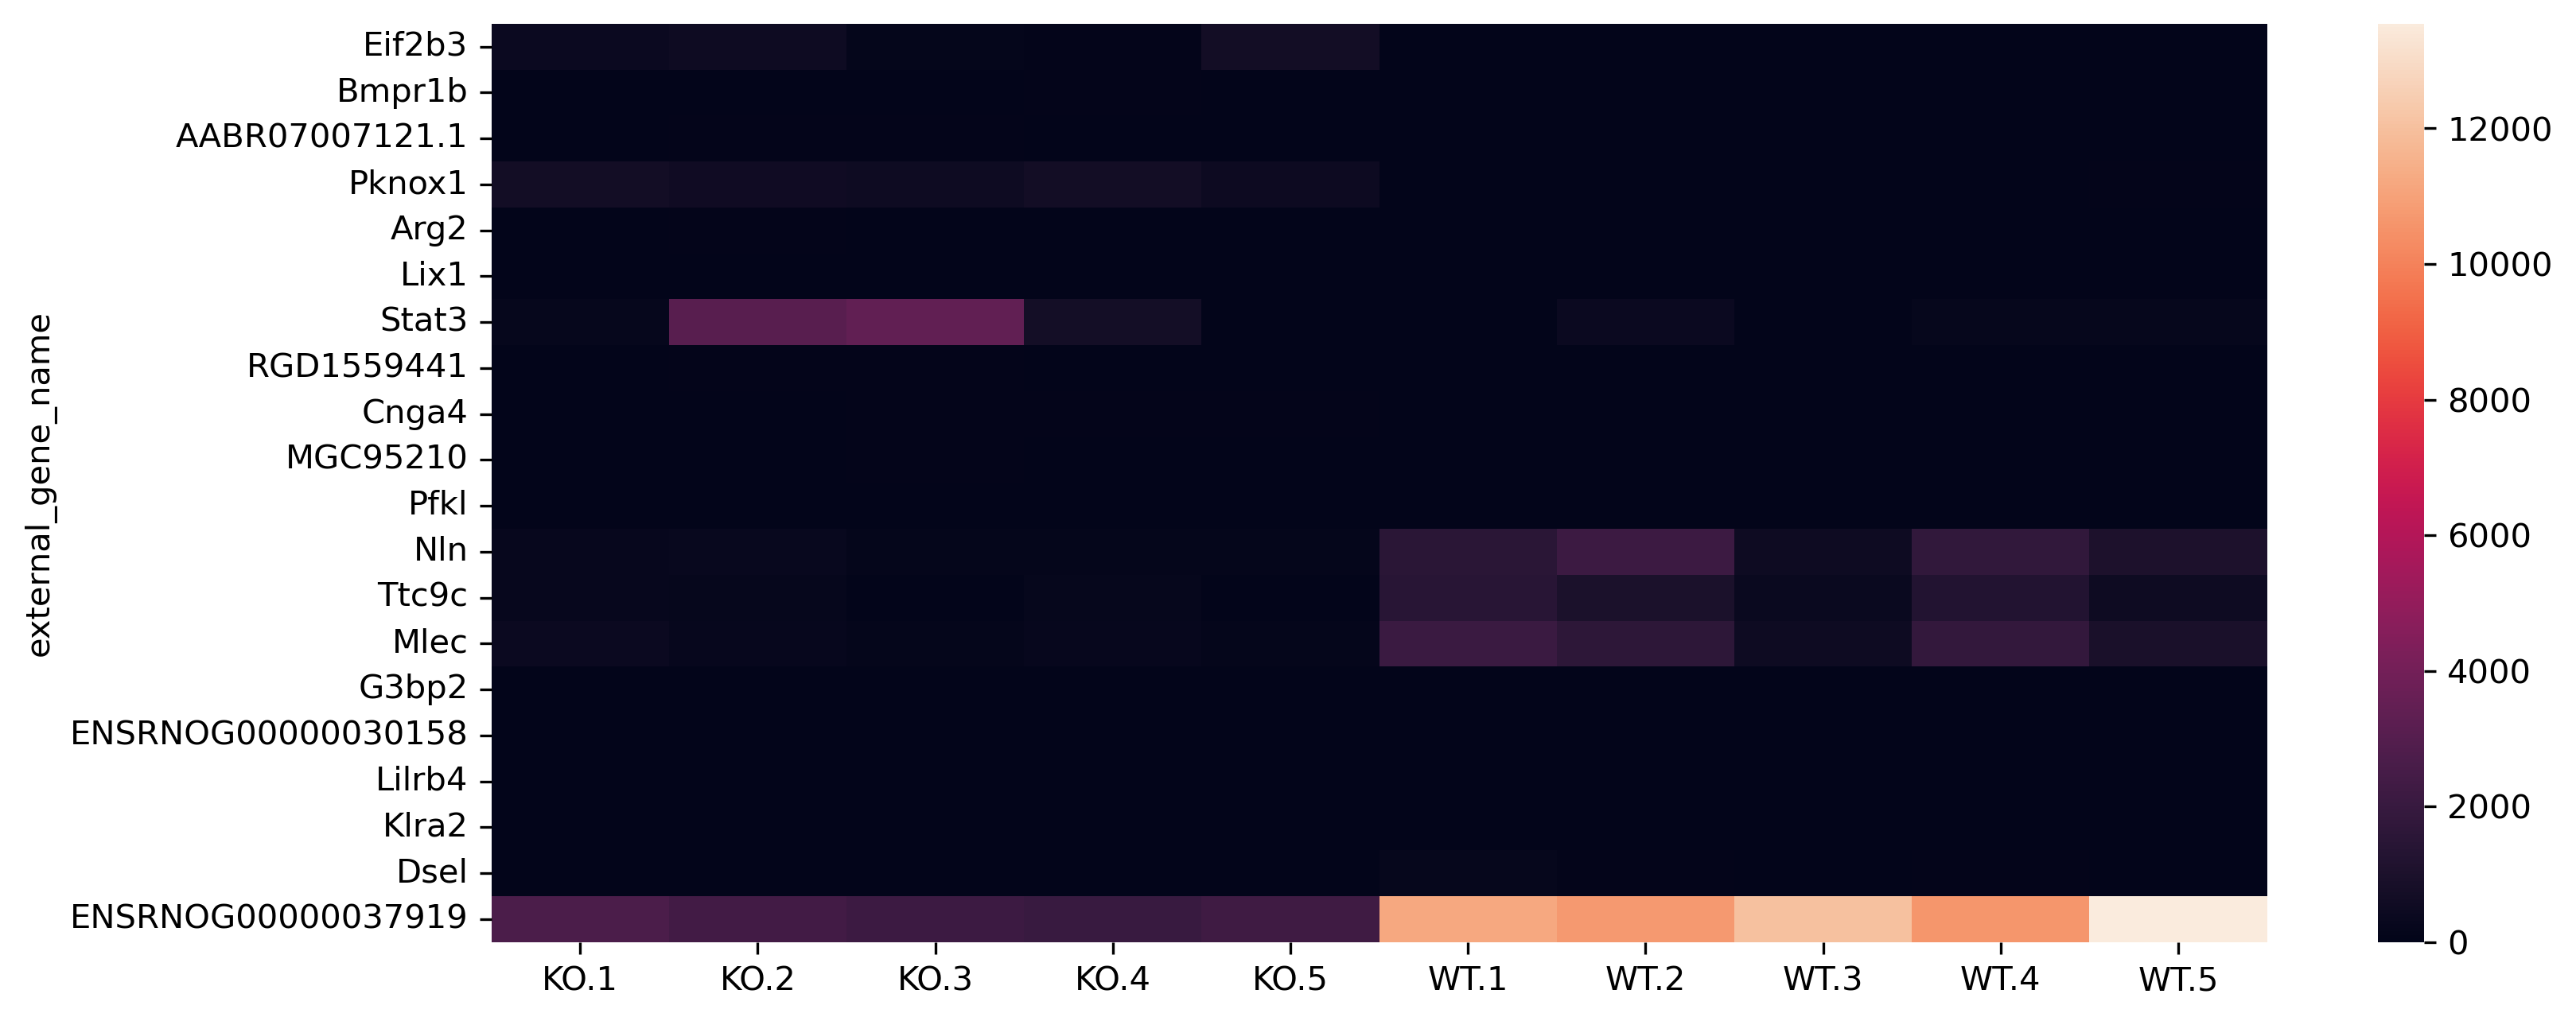

In [36]:
sns.heatmap(heatmapData)

You can customize it with different color palettes, row and column labels, etc.

Text(364.1666666666666, 0.5, 'gene name')

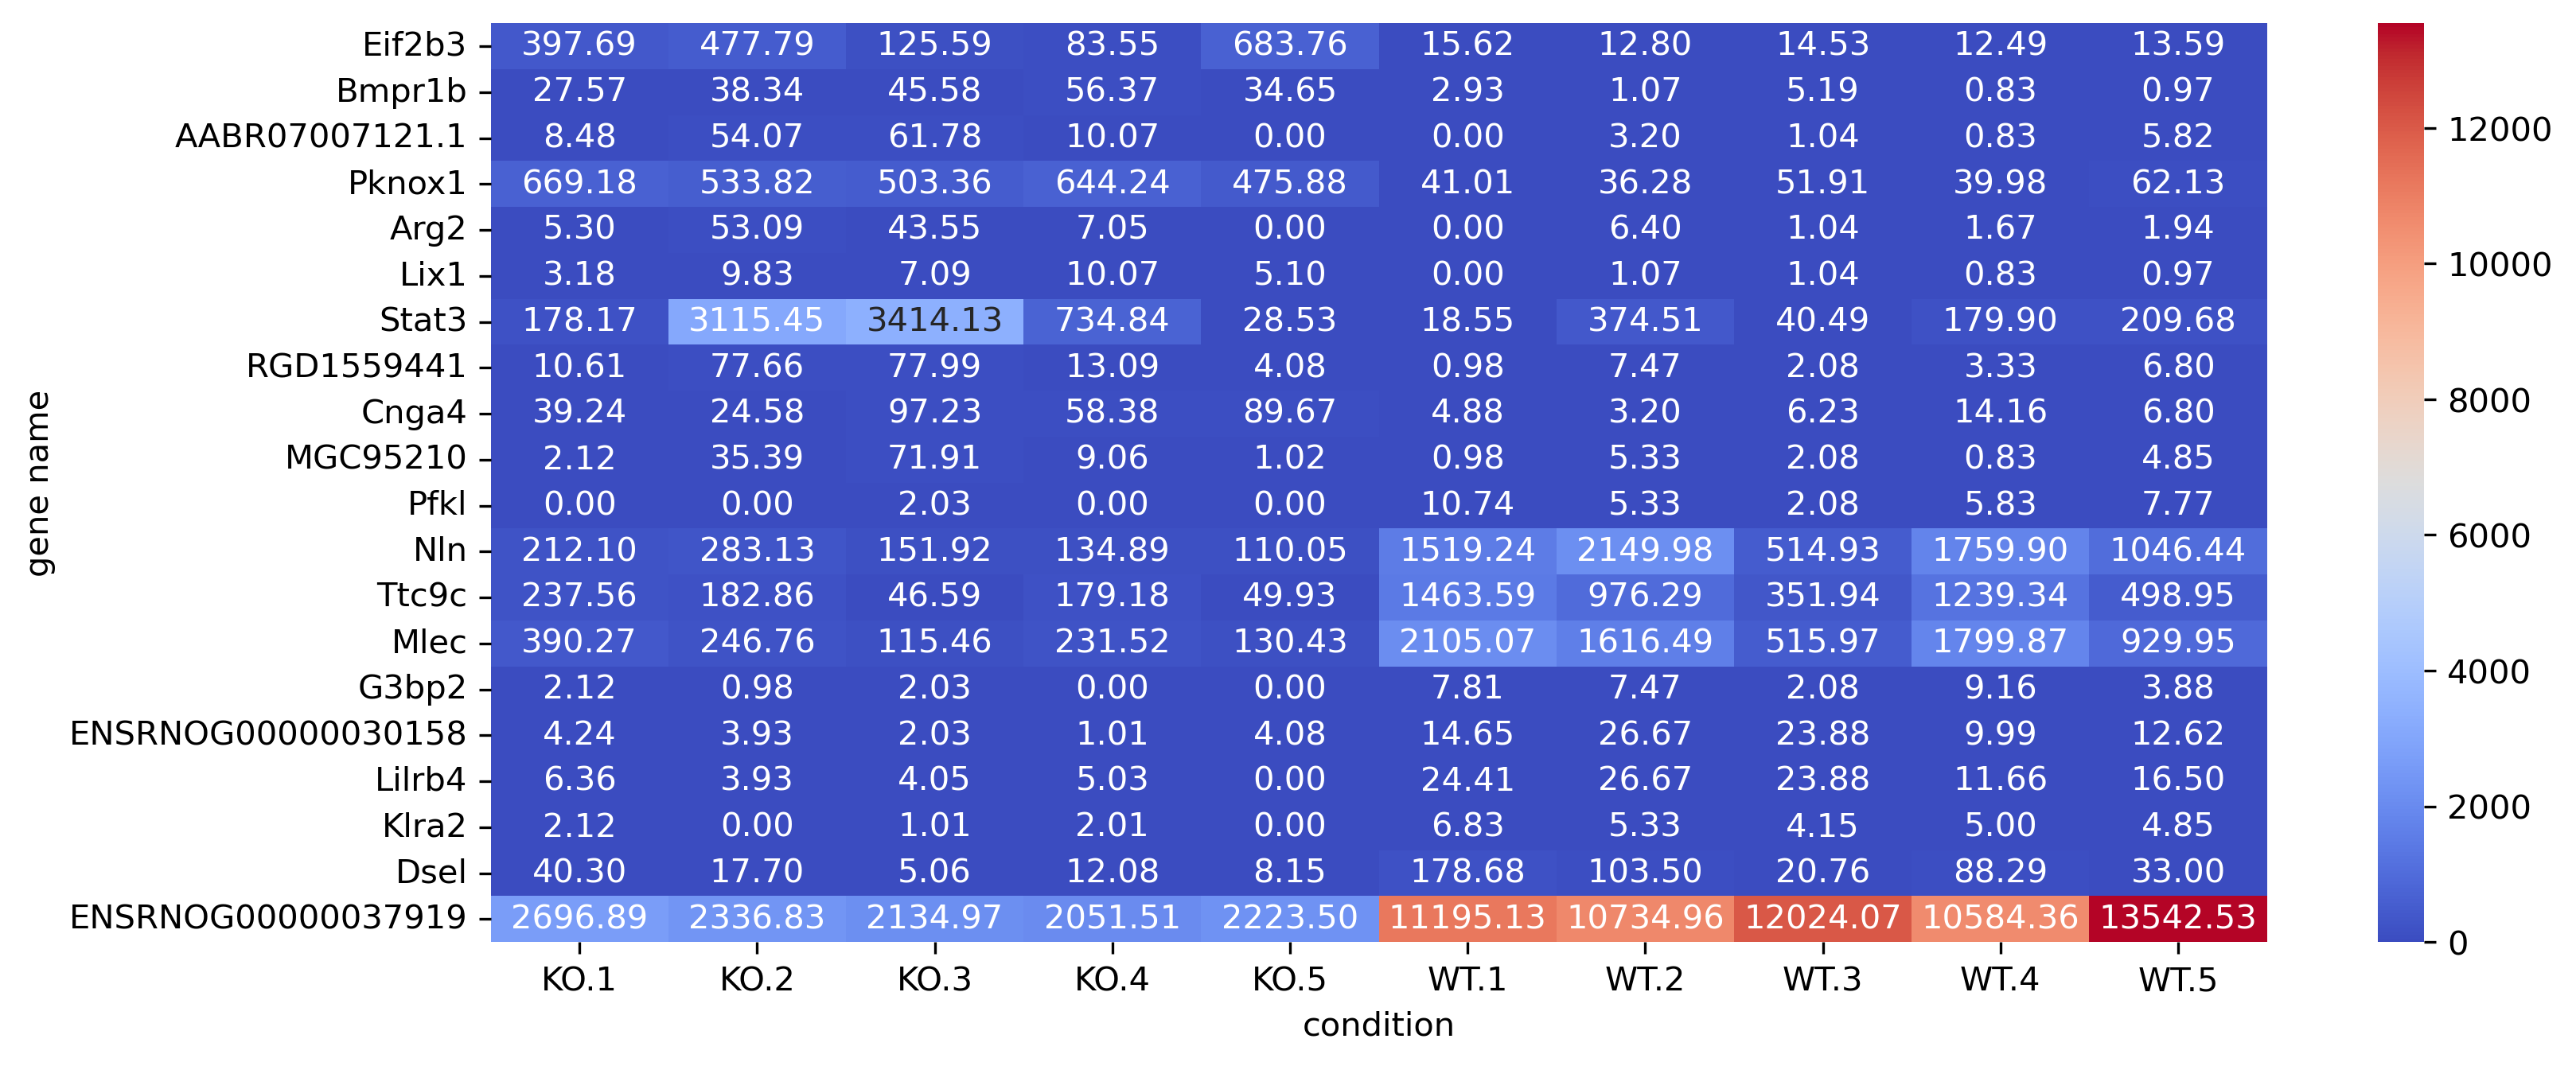

In [38]:
sns.heatmap(heatmapData, cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('condition')
plt.ylabel('gene name')

Text(364.1666666666666, 0.5, 'gene name')

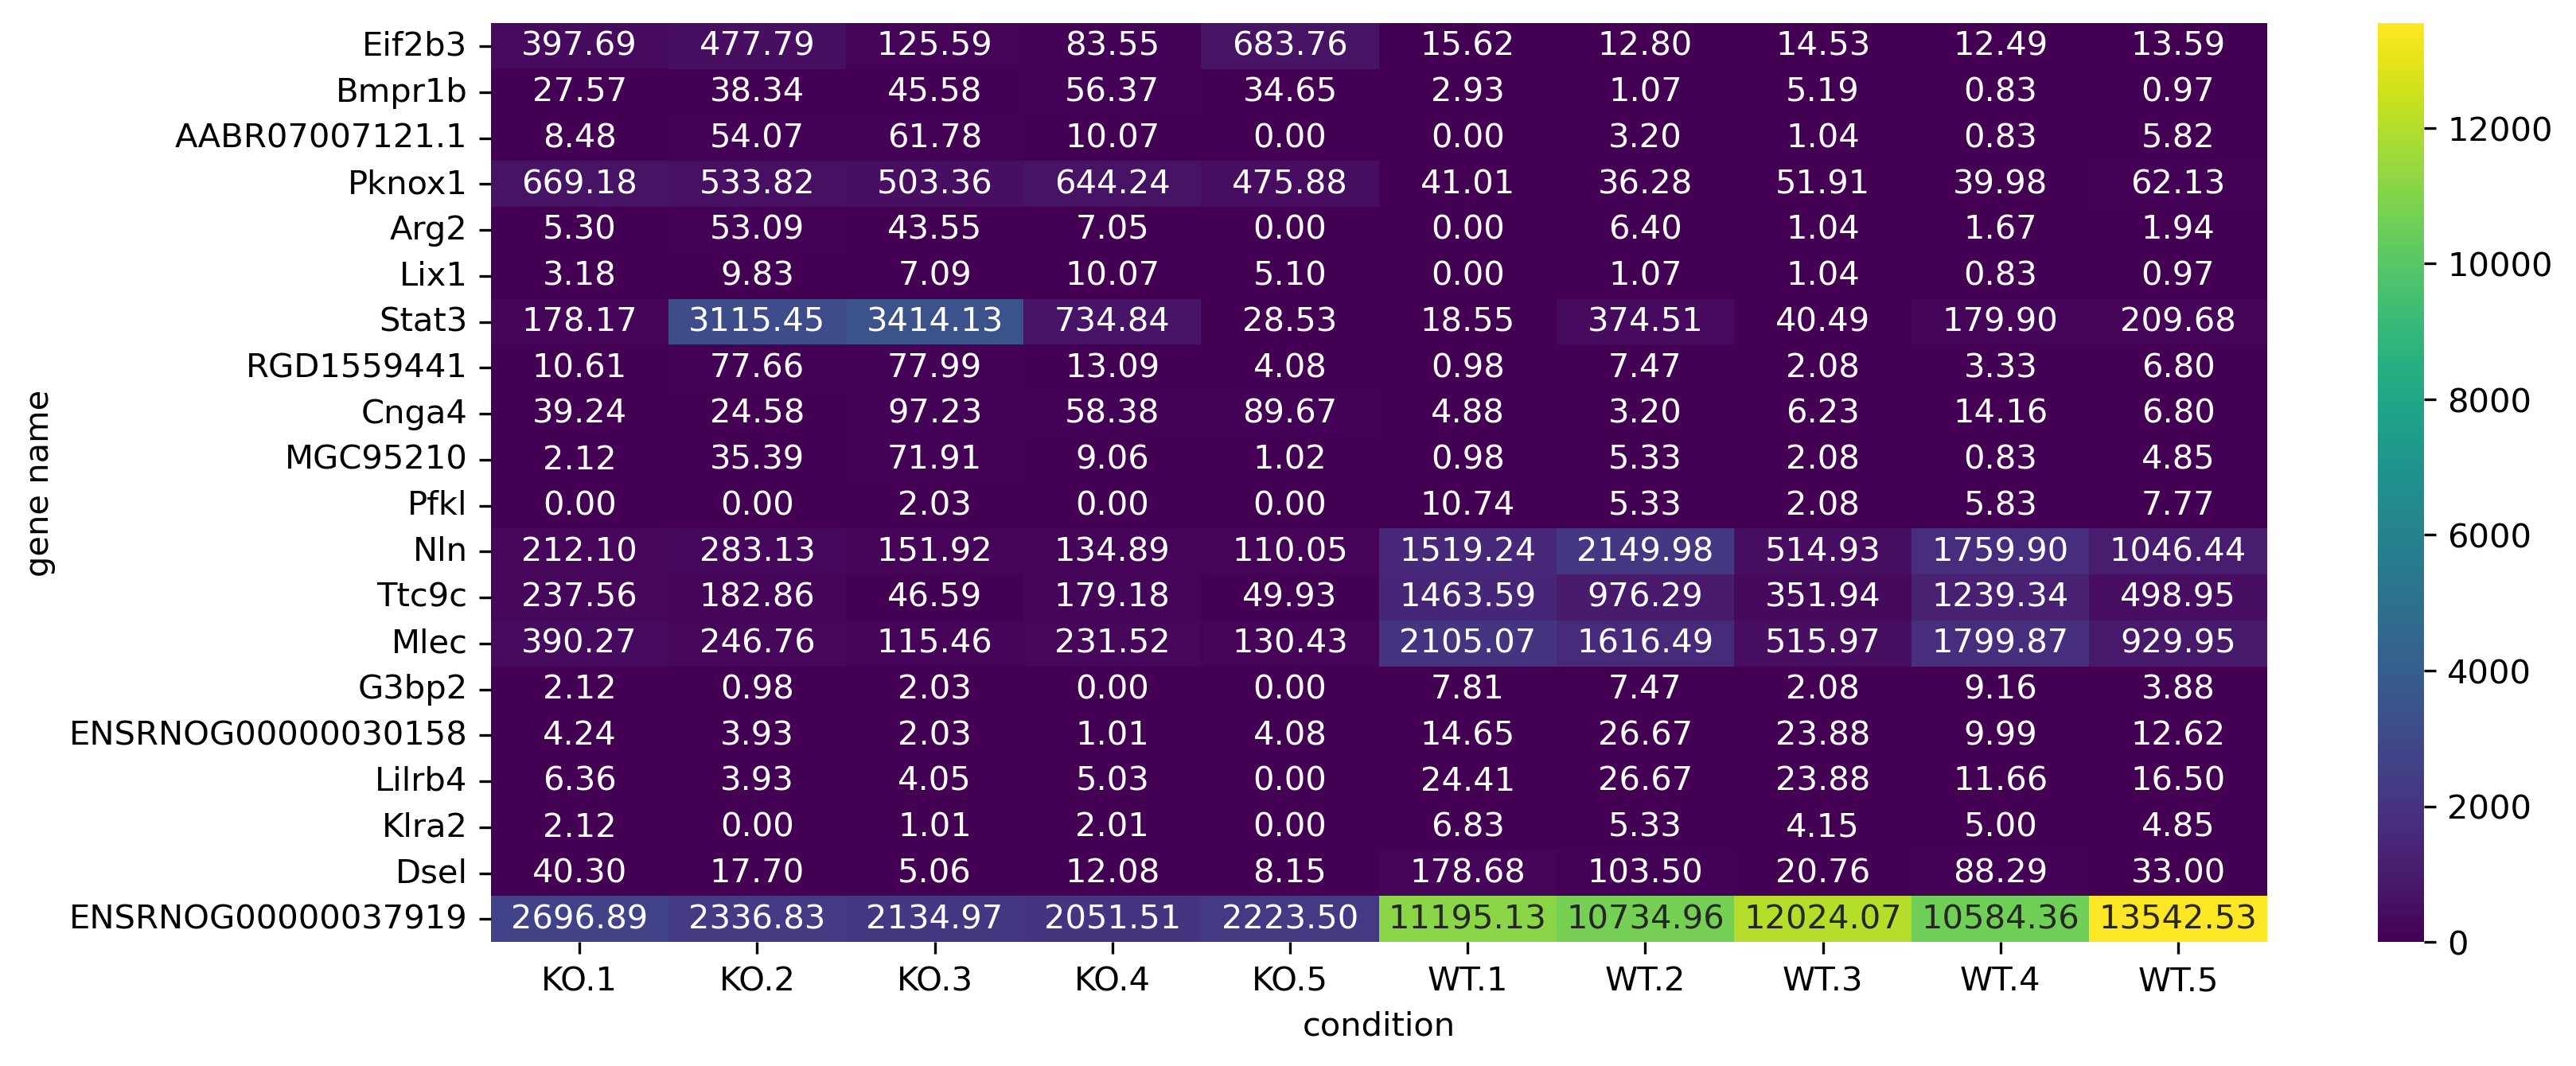

In [39]:
sns.heatmap(heatmapData, cmap='viridis', annot=True, fmt=".2f")
plt.xlabel('condition')
plt.ylabel('gene name')

Similar to heatmap, you can also use `clustermap` function to cluster the rows and columns. This can be useful to identify patterns in the data.

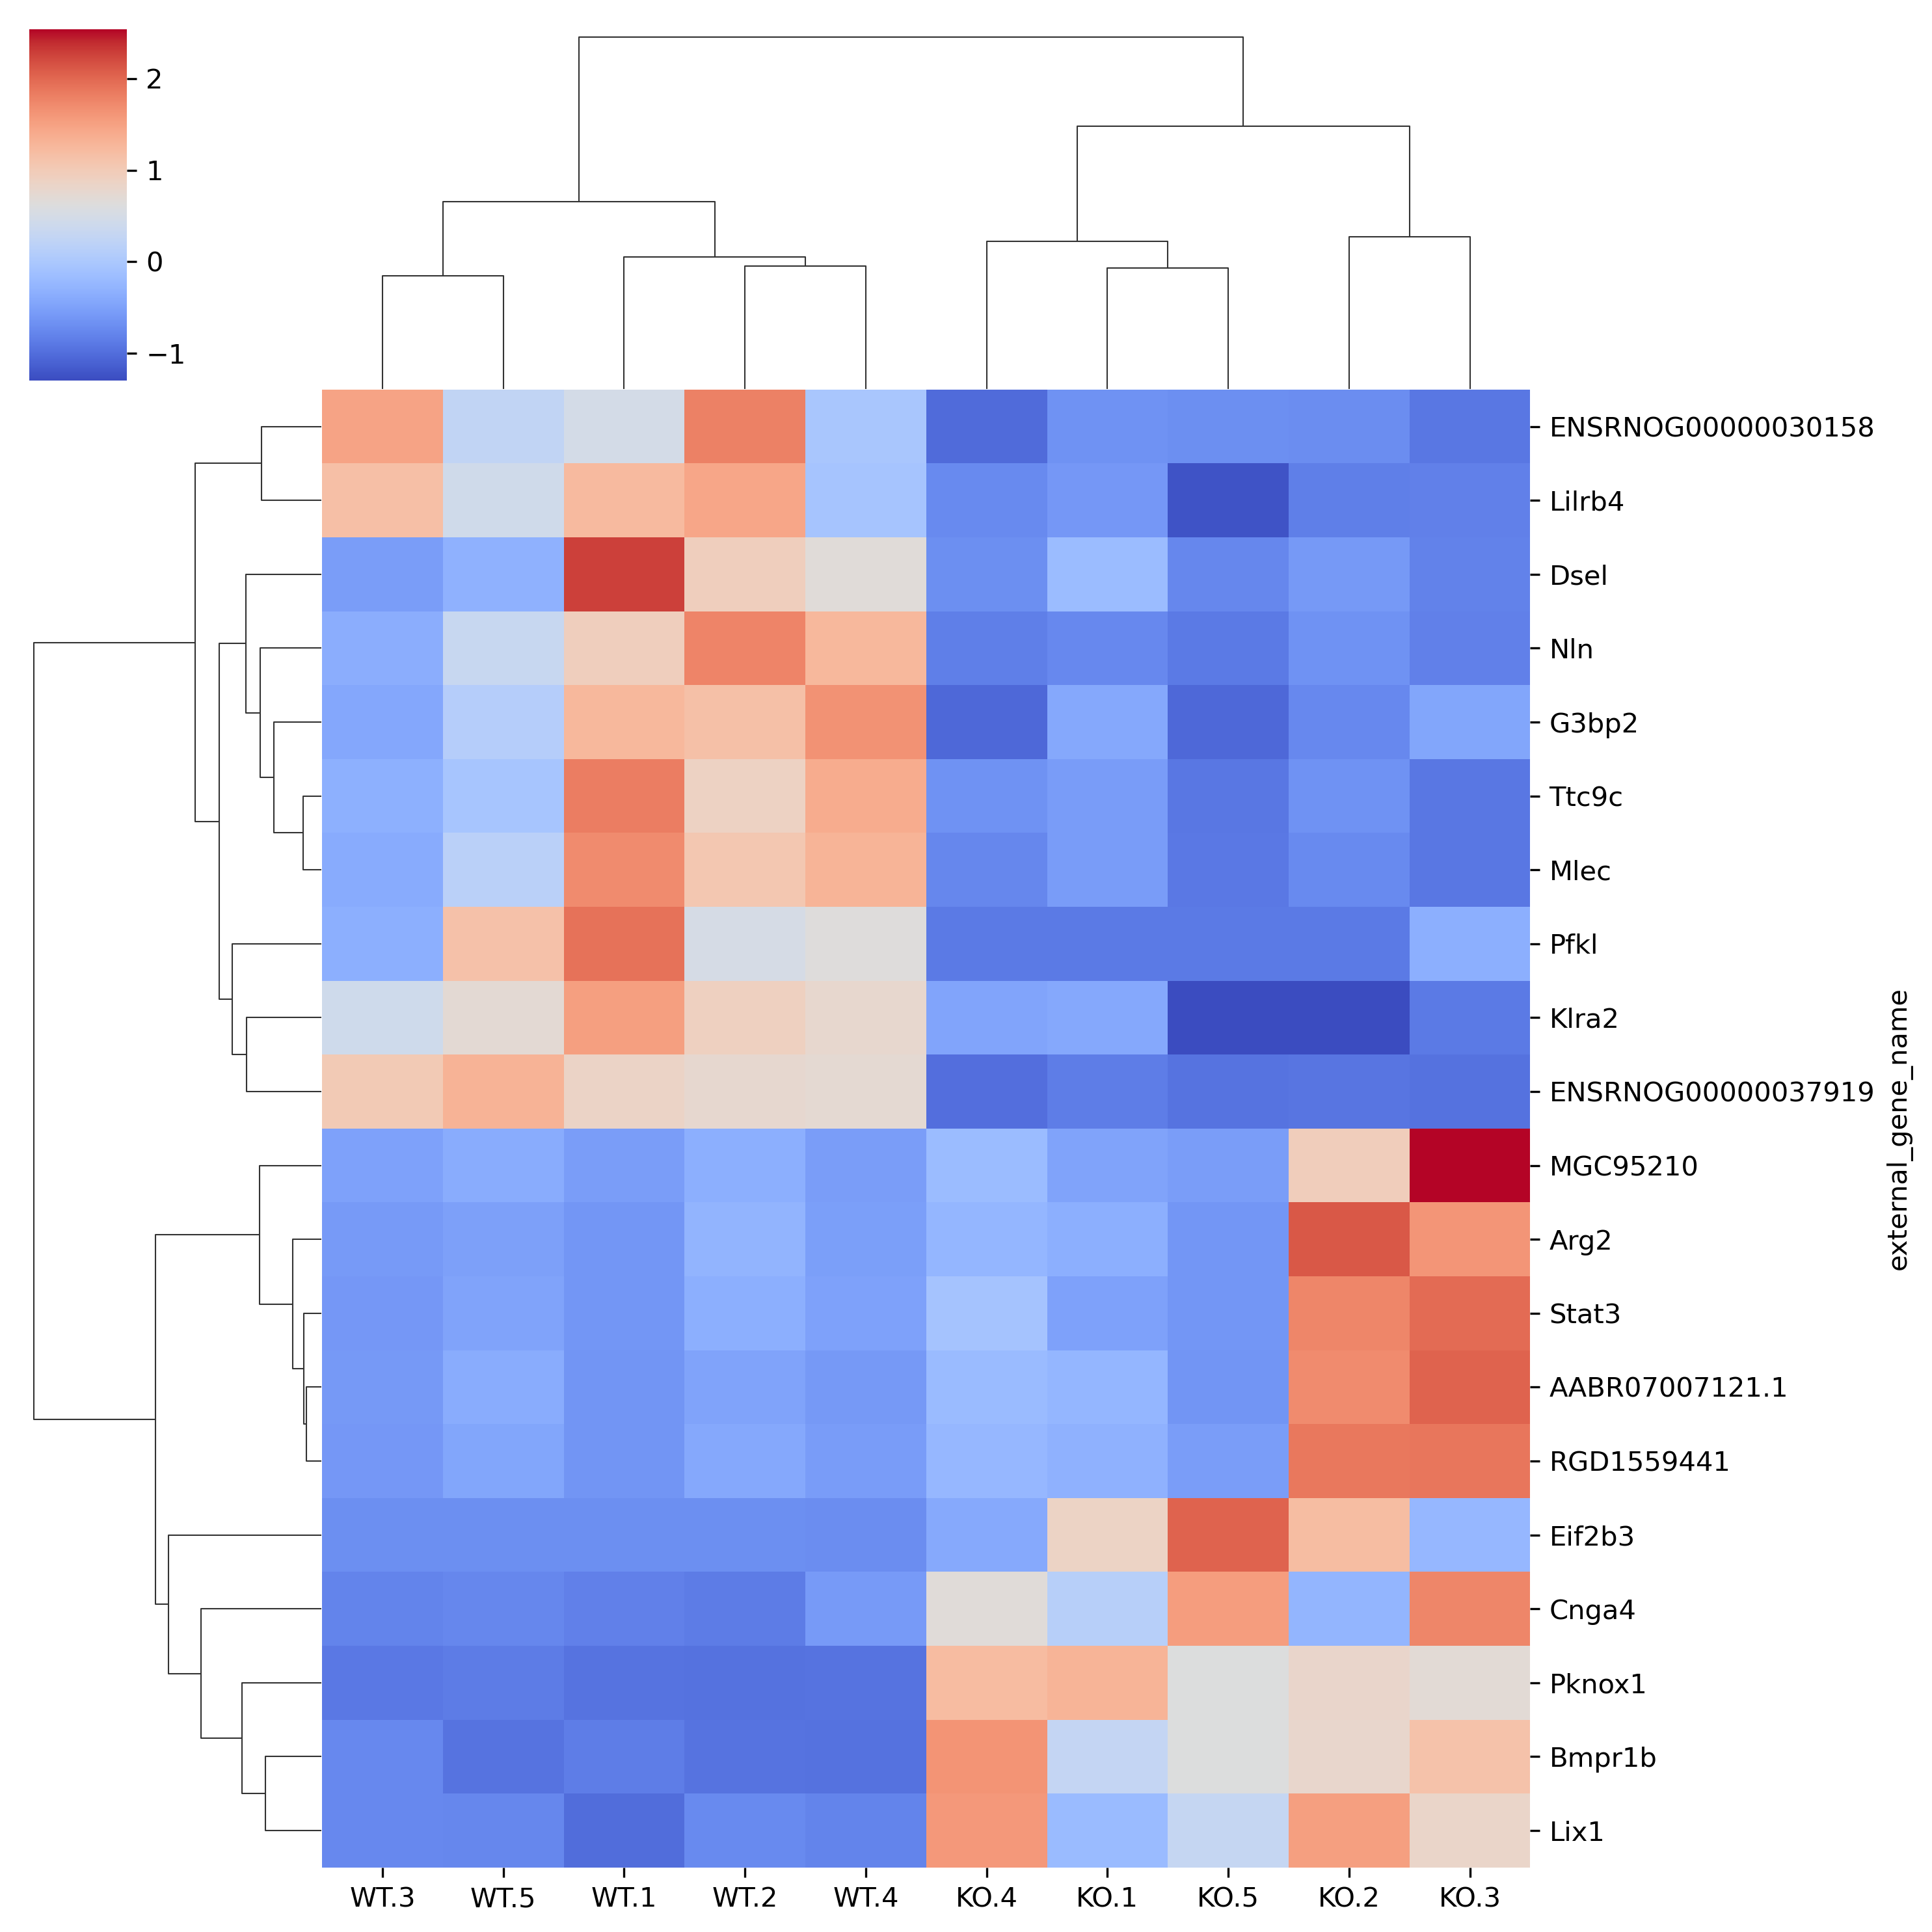

In [41]:
sns.clustermap(heatmapData, z_score=0, cmap='coolwarm')

you can also add values to the heatmap.

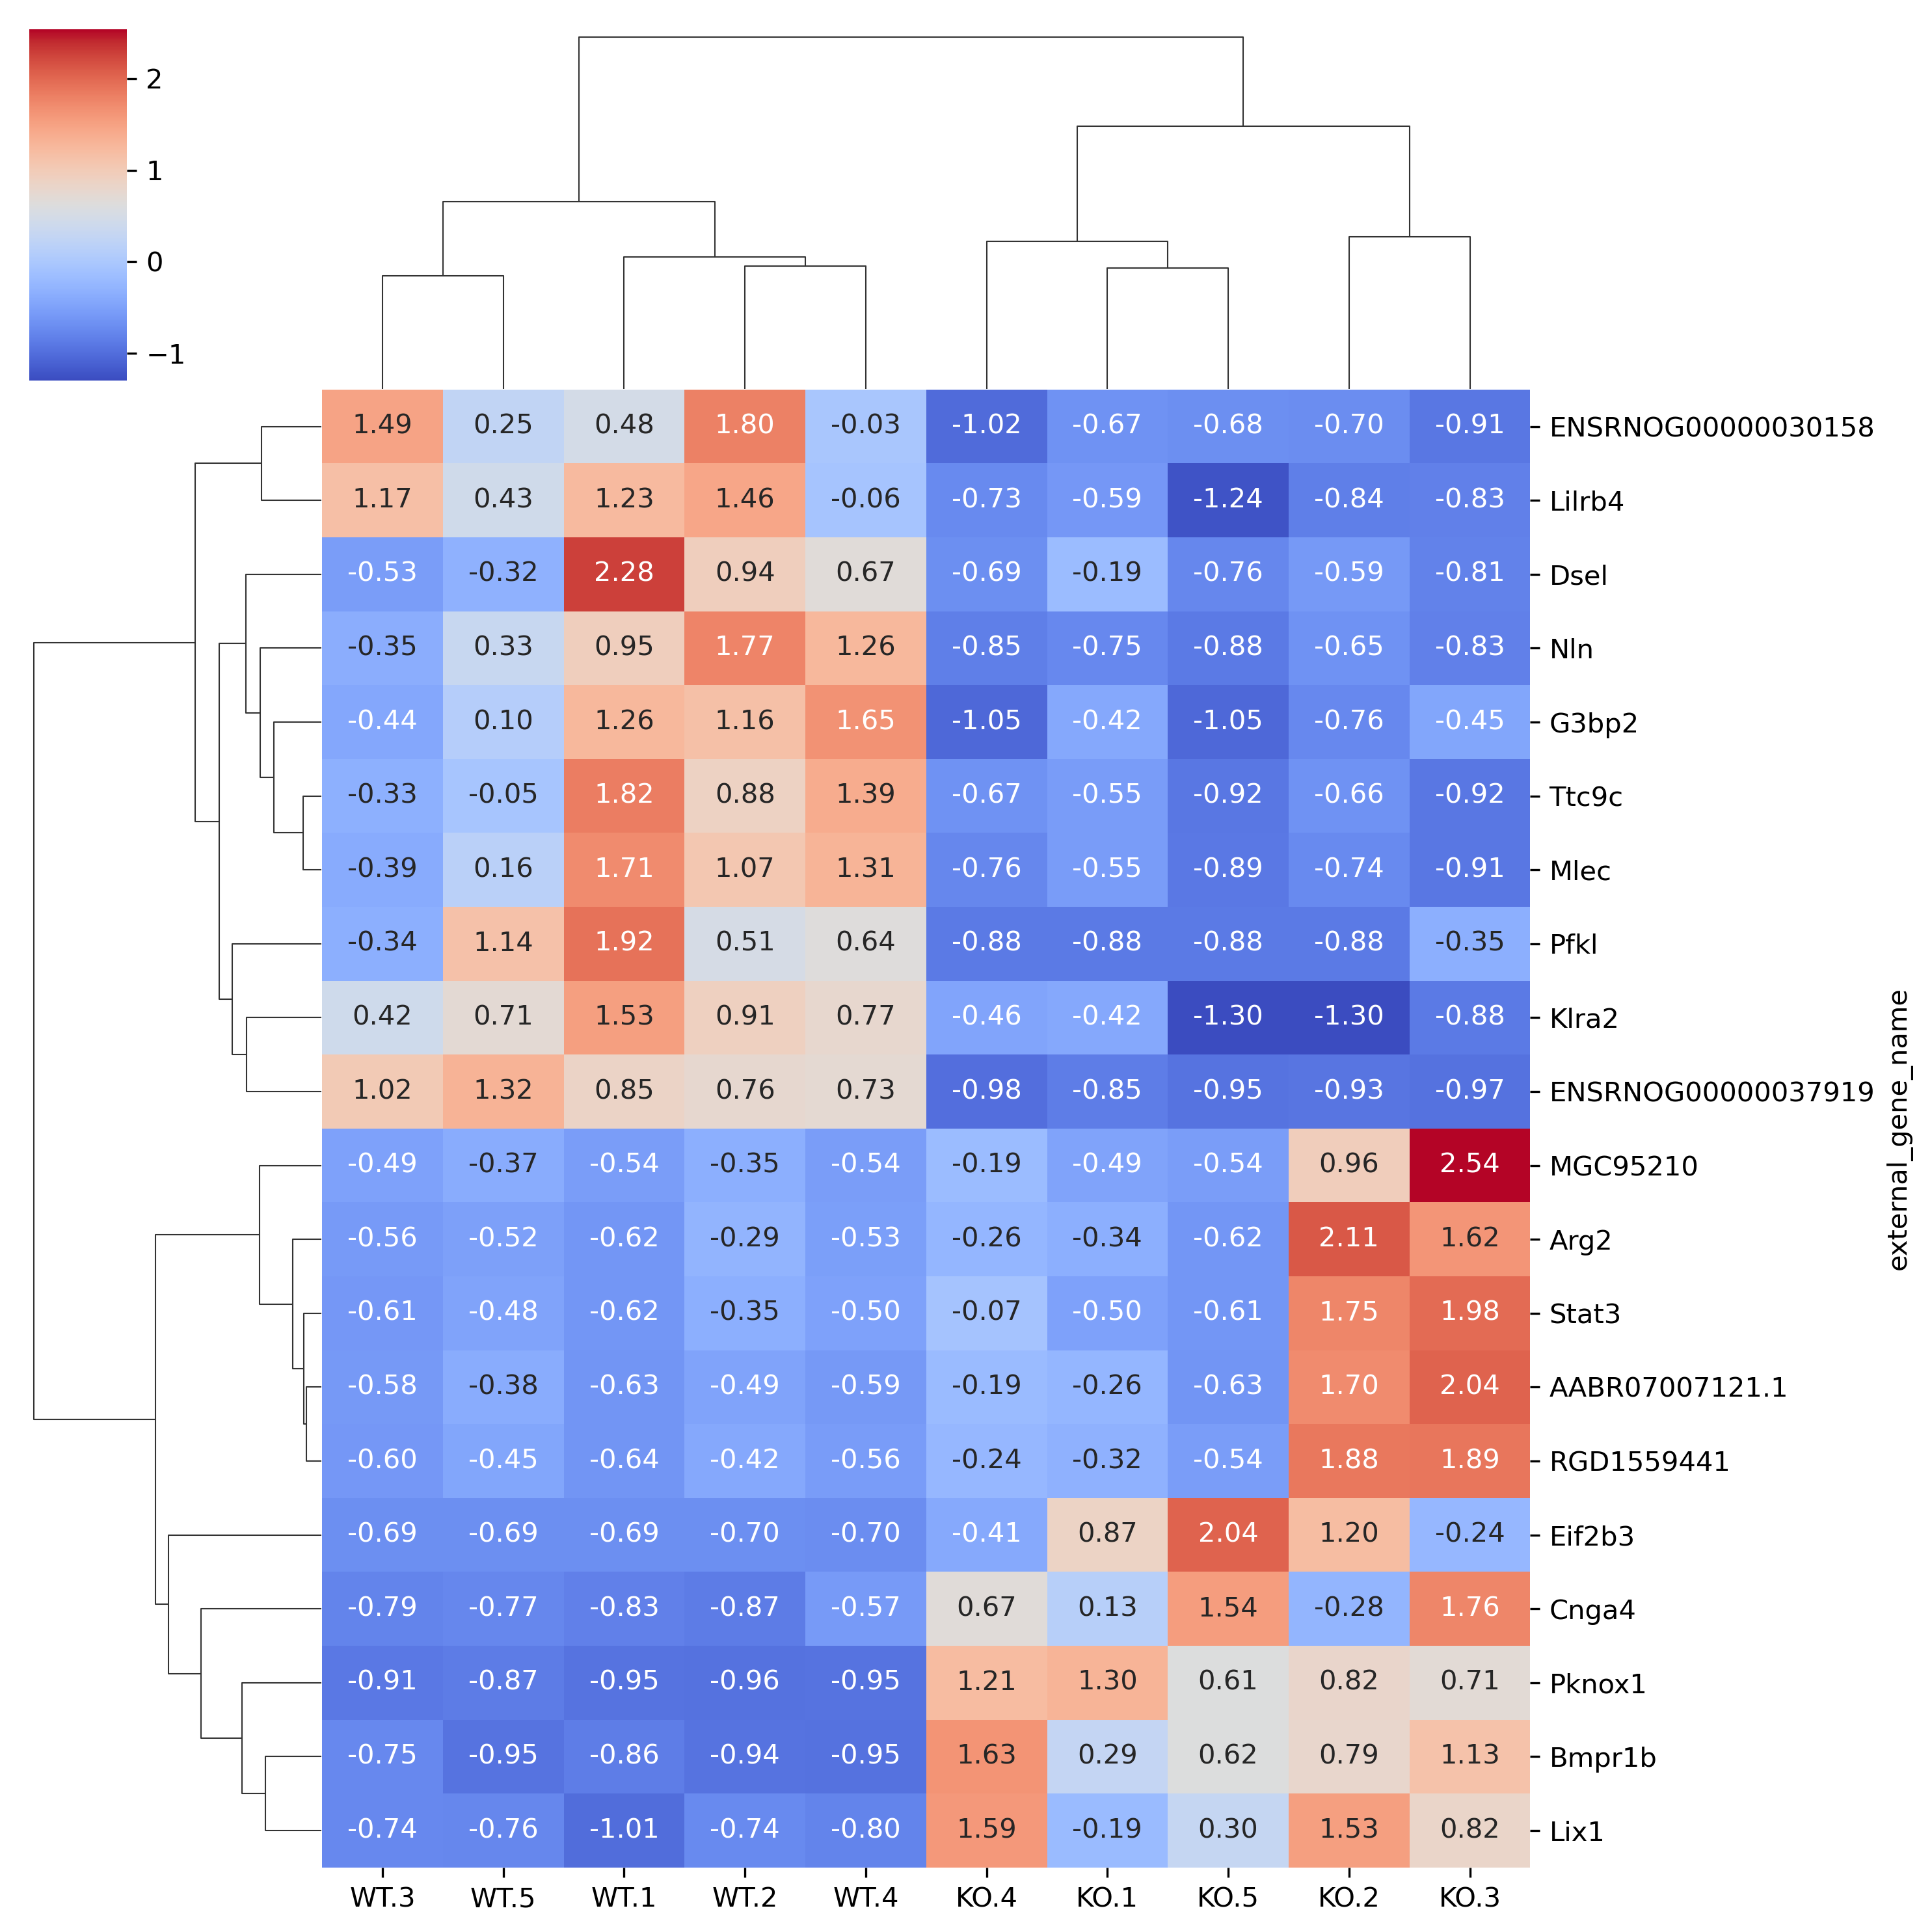

In [42]:
sns.clustermap(heatmapData, z_score=0, cmap='coolwarm', annot=True, fmt=".2f")

Let's save this plot.

In [31]:
plt.savefig('heatmap.png')

<Figure size 2400x1800 with 0 Axes>

## Gene expression plots

One common task in DE analysis is to plot the expression of genes across samples. This can be done using seaborn's point plot.

Note: you can also create various other plots like violin plot, box plot, etc. using seaborn, but for simplicity, we will use point plot here.

Previously, we generated the top 10 differentially expressed genes. We will use that data for this example.

In [43]:
topUp = deseq.loc[upFilter].nlargest(10, 'log2FoldChange')
topDown = deseq.loc[downFilter].nsmallest(10, 'log2FoldChange')

We will select to keep the required columns.

In [45]:
topUp = topUp[['external_gene_name', 'KO.1', 'KO.2', 'KO.3', 'KO.4', 'KO.5', 'WT.1', 'WT.2', 'WT.3', 'WT.4', 'WT.5']]
topDown = topDown[['external_gene_name', 'KO.1', 'KO.2', 'KO.3', 'KO.4', 'KO.5', 'WT.1', 'WT.2', 'WT.3', 'WT.4', 'WT.5']]

we will reshape this data to long format.

In [46]:
topUp = topUp.melt(id_vars='external_gene_name', var_name='Sample', value_name='Normalized expression')
topDown = topDown.melt(id_vars='external_gene_name', var_name='Sample', value_name='Normalized expression')

A 'condition' column identifying KO and WT samples will be added.

In [47]:
topUp['condition'] = 'KO'
topDown['condition'] = 'KO'
filter = topUp['Sample'].str.contains('WT')
topUp.loc[filter, 'condition'] = 'WT'
topDown.loc[filter, 'condition'] = 'WT'

Drop columns with NaN values.

In [48]:
topUp = topUp.dropna()
topDown = topDown.dropna()

Rename `external_gene_name` as simply 'Gene'.

In [49]:
topUp = topUp.rename(columns={'external_gene_name': 'Gene'})
topDown = topDown.rename(columns={'external_gene_name': 'Gene'})

We now have the dataset suitable for plotting.

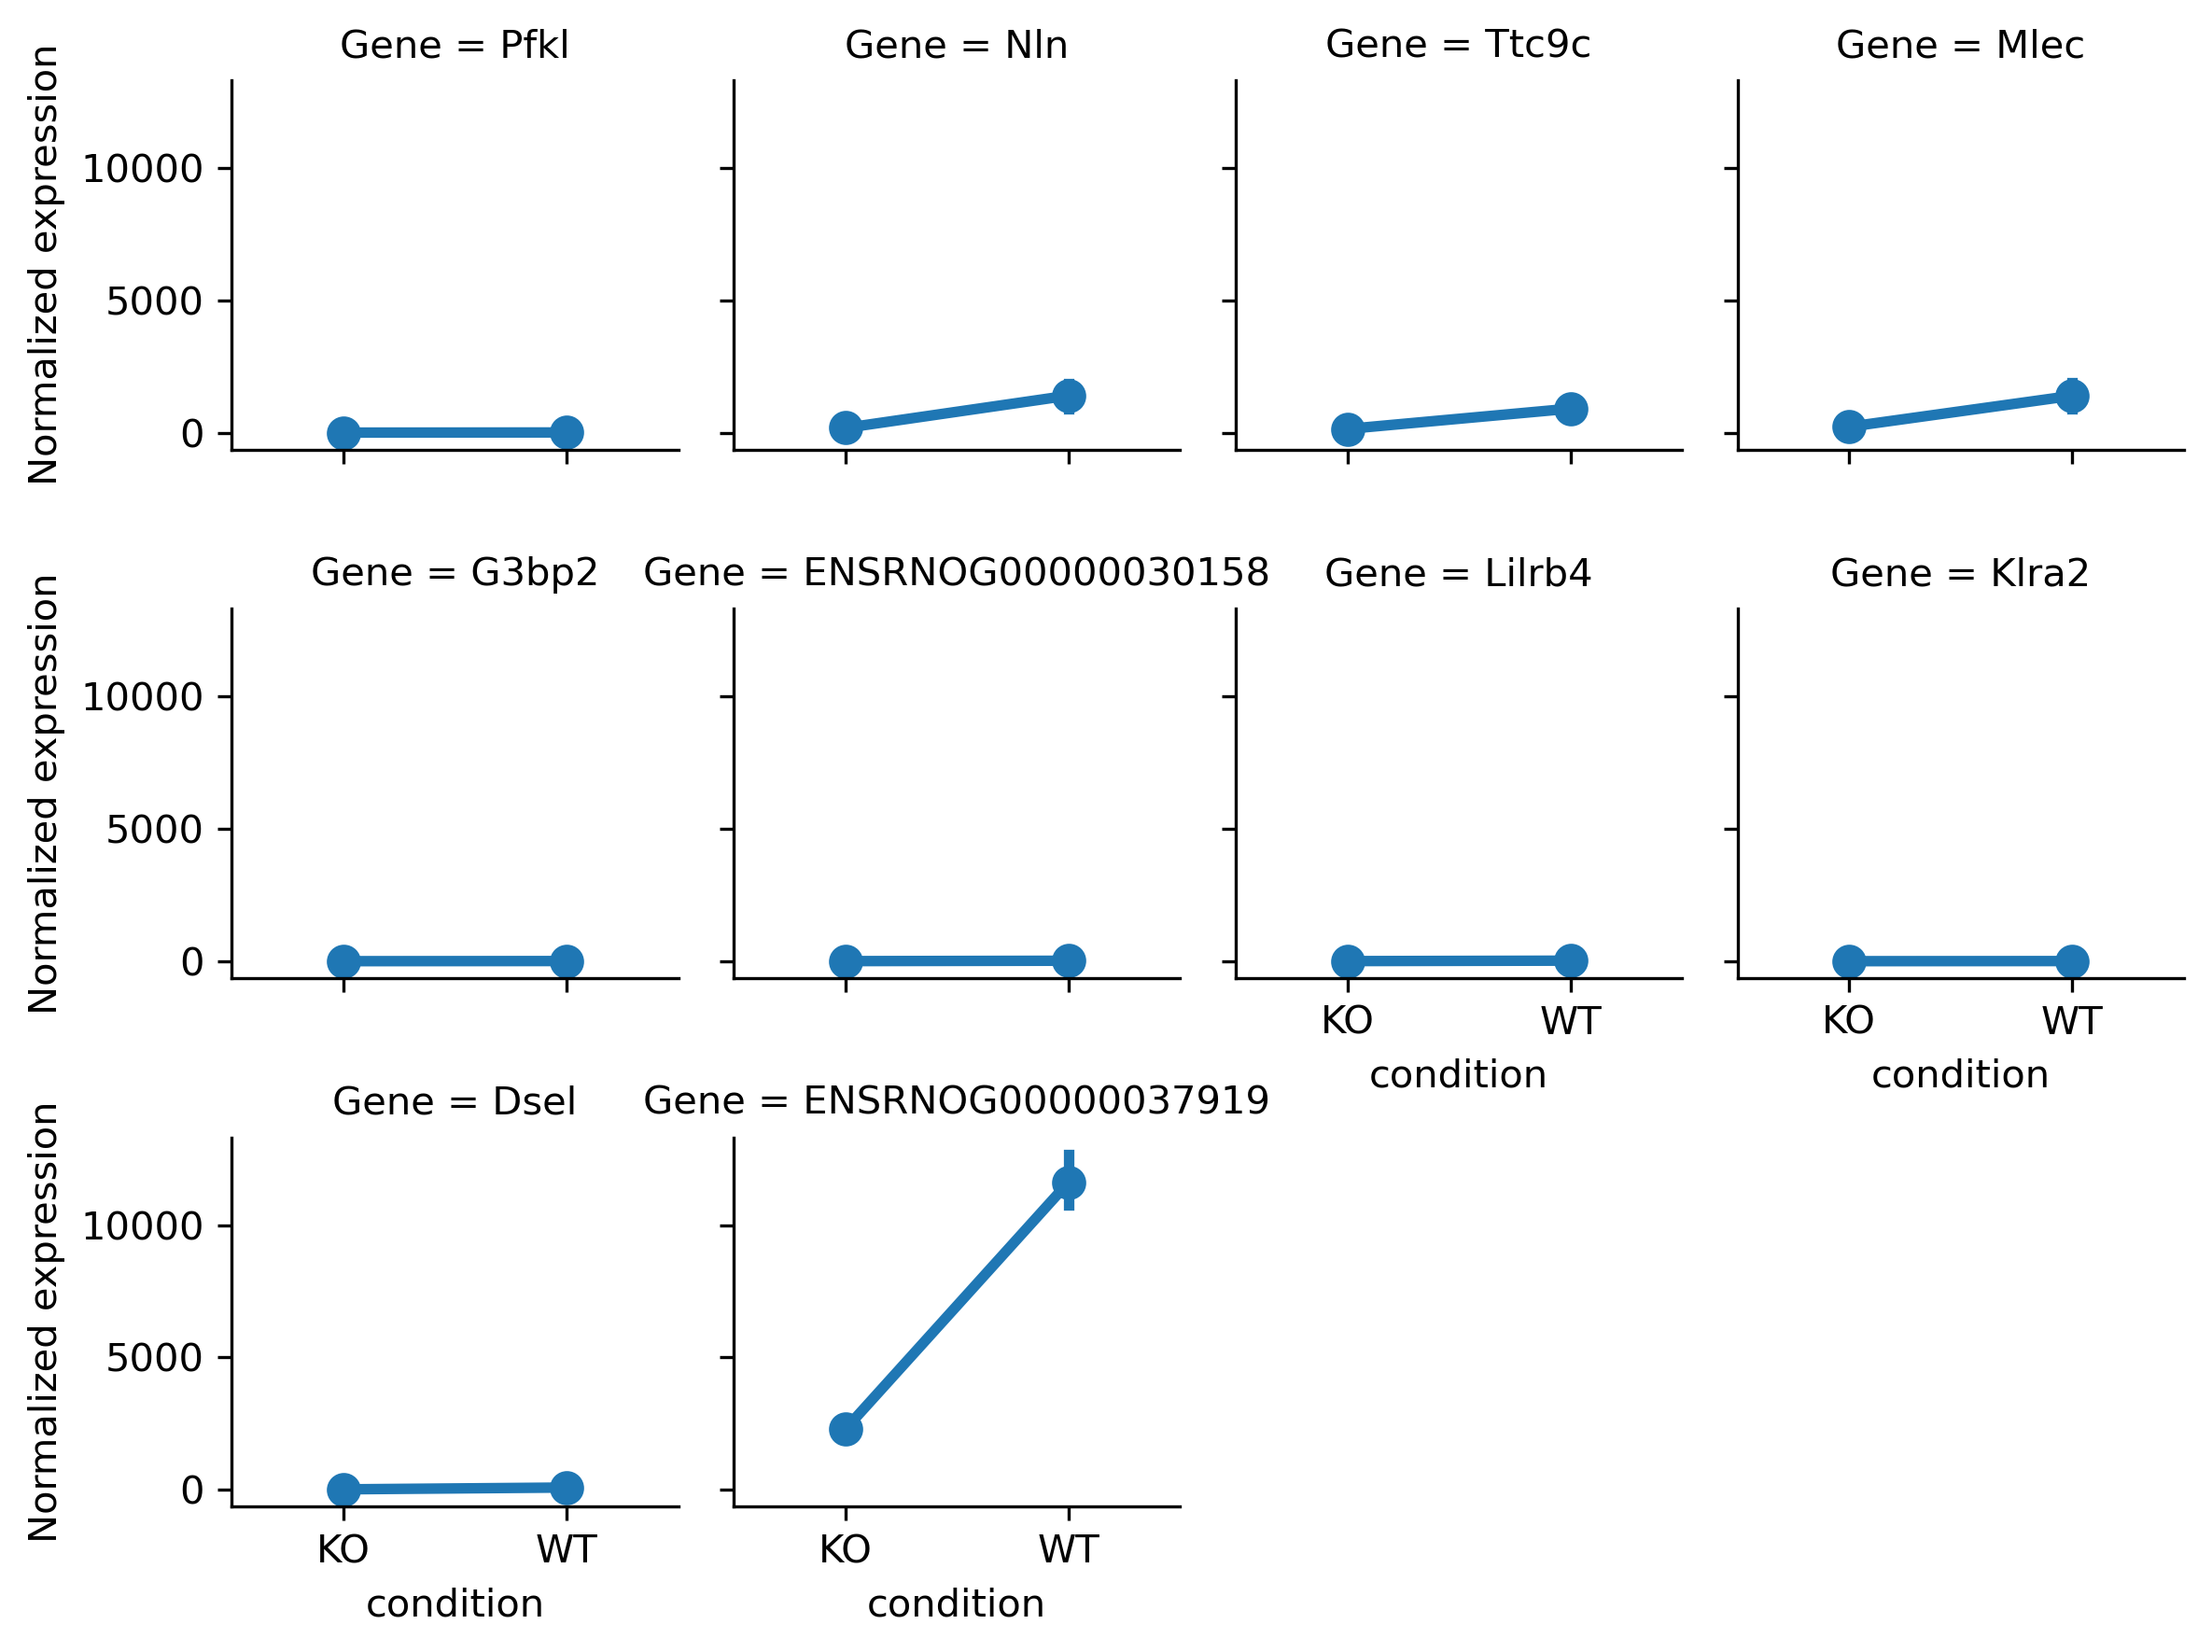

In [50]:
g = sns.FacetGrid(topDown, col="Gene", col_wrap=4, height=2)
g.map(sns.pointplot, "condition", "Normalized expression", order=['KO', 'WT'])

We could make the y-axis free for each plot, so that we can visualize the difference better:

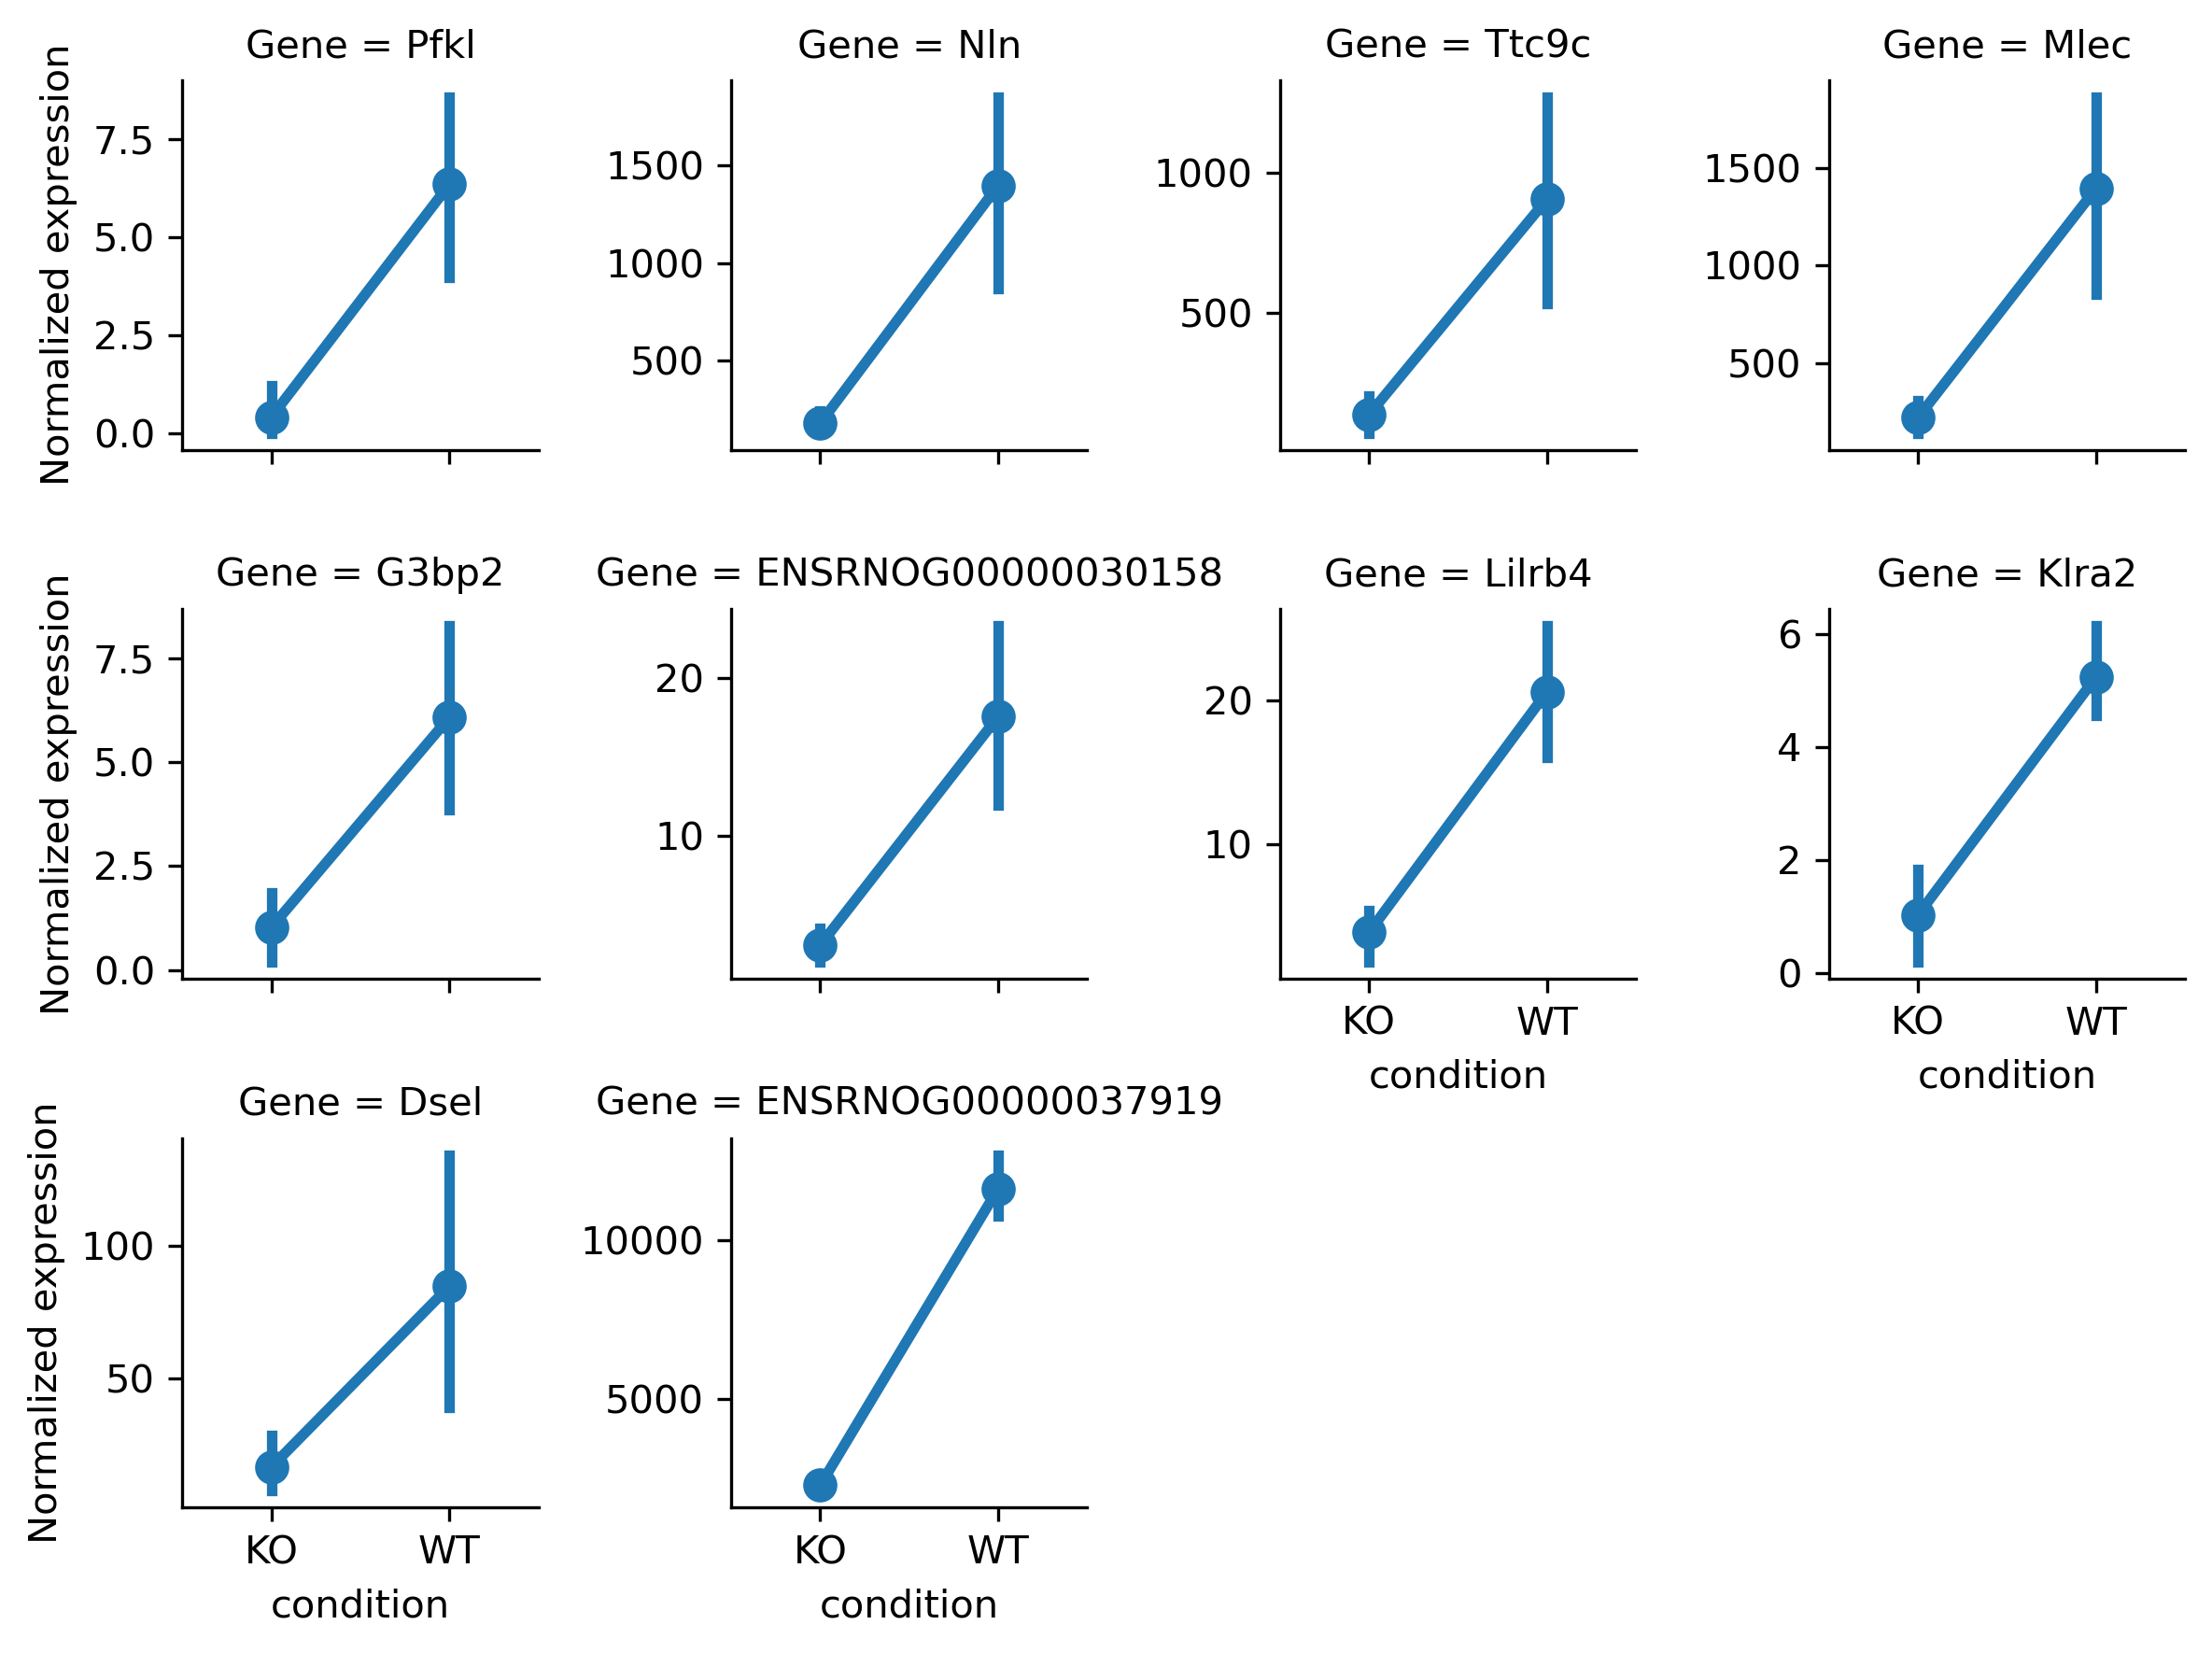

In [51]:
g = sns.FacetGrid(topDown, col="Gene", col_wrap=4, height=2, sharey=False)
g.map(sns.pointplot, "condition", "Normalized expression", order=['KO', 'WT'])

the trend is much clearer now. You can also remove error bars and change color.

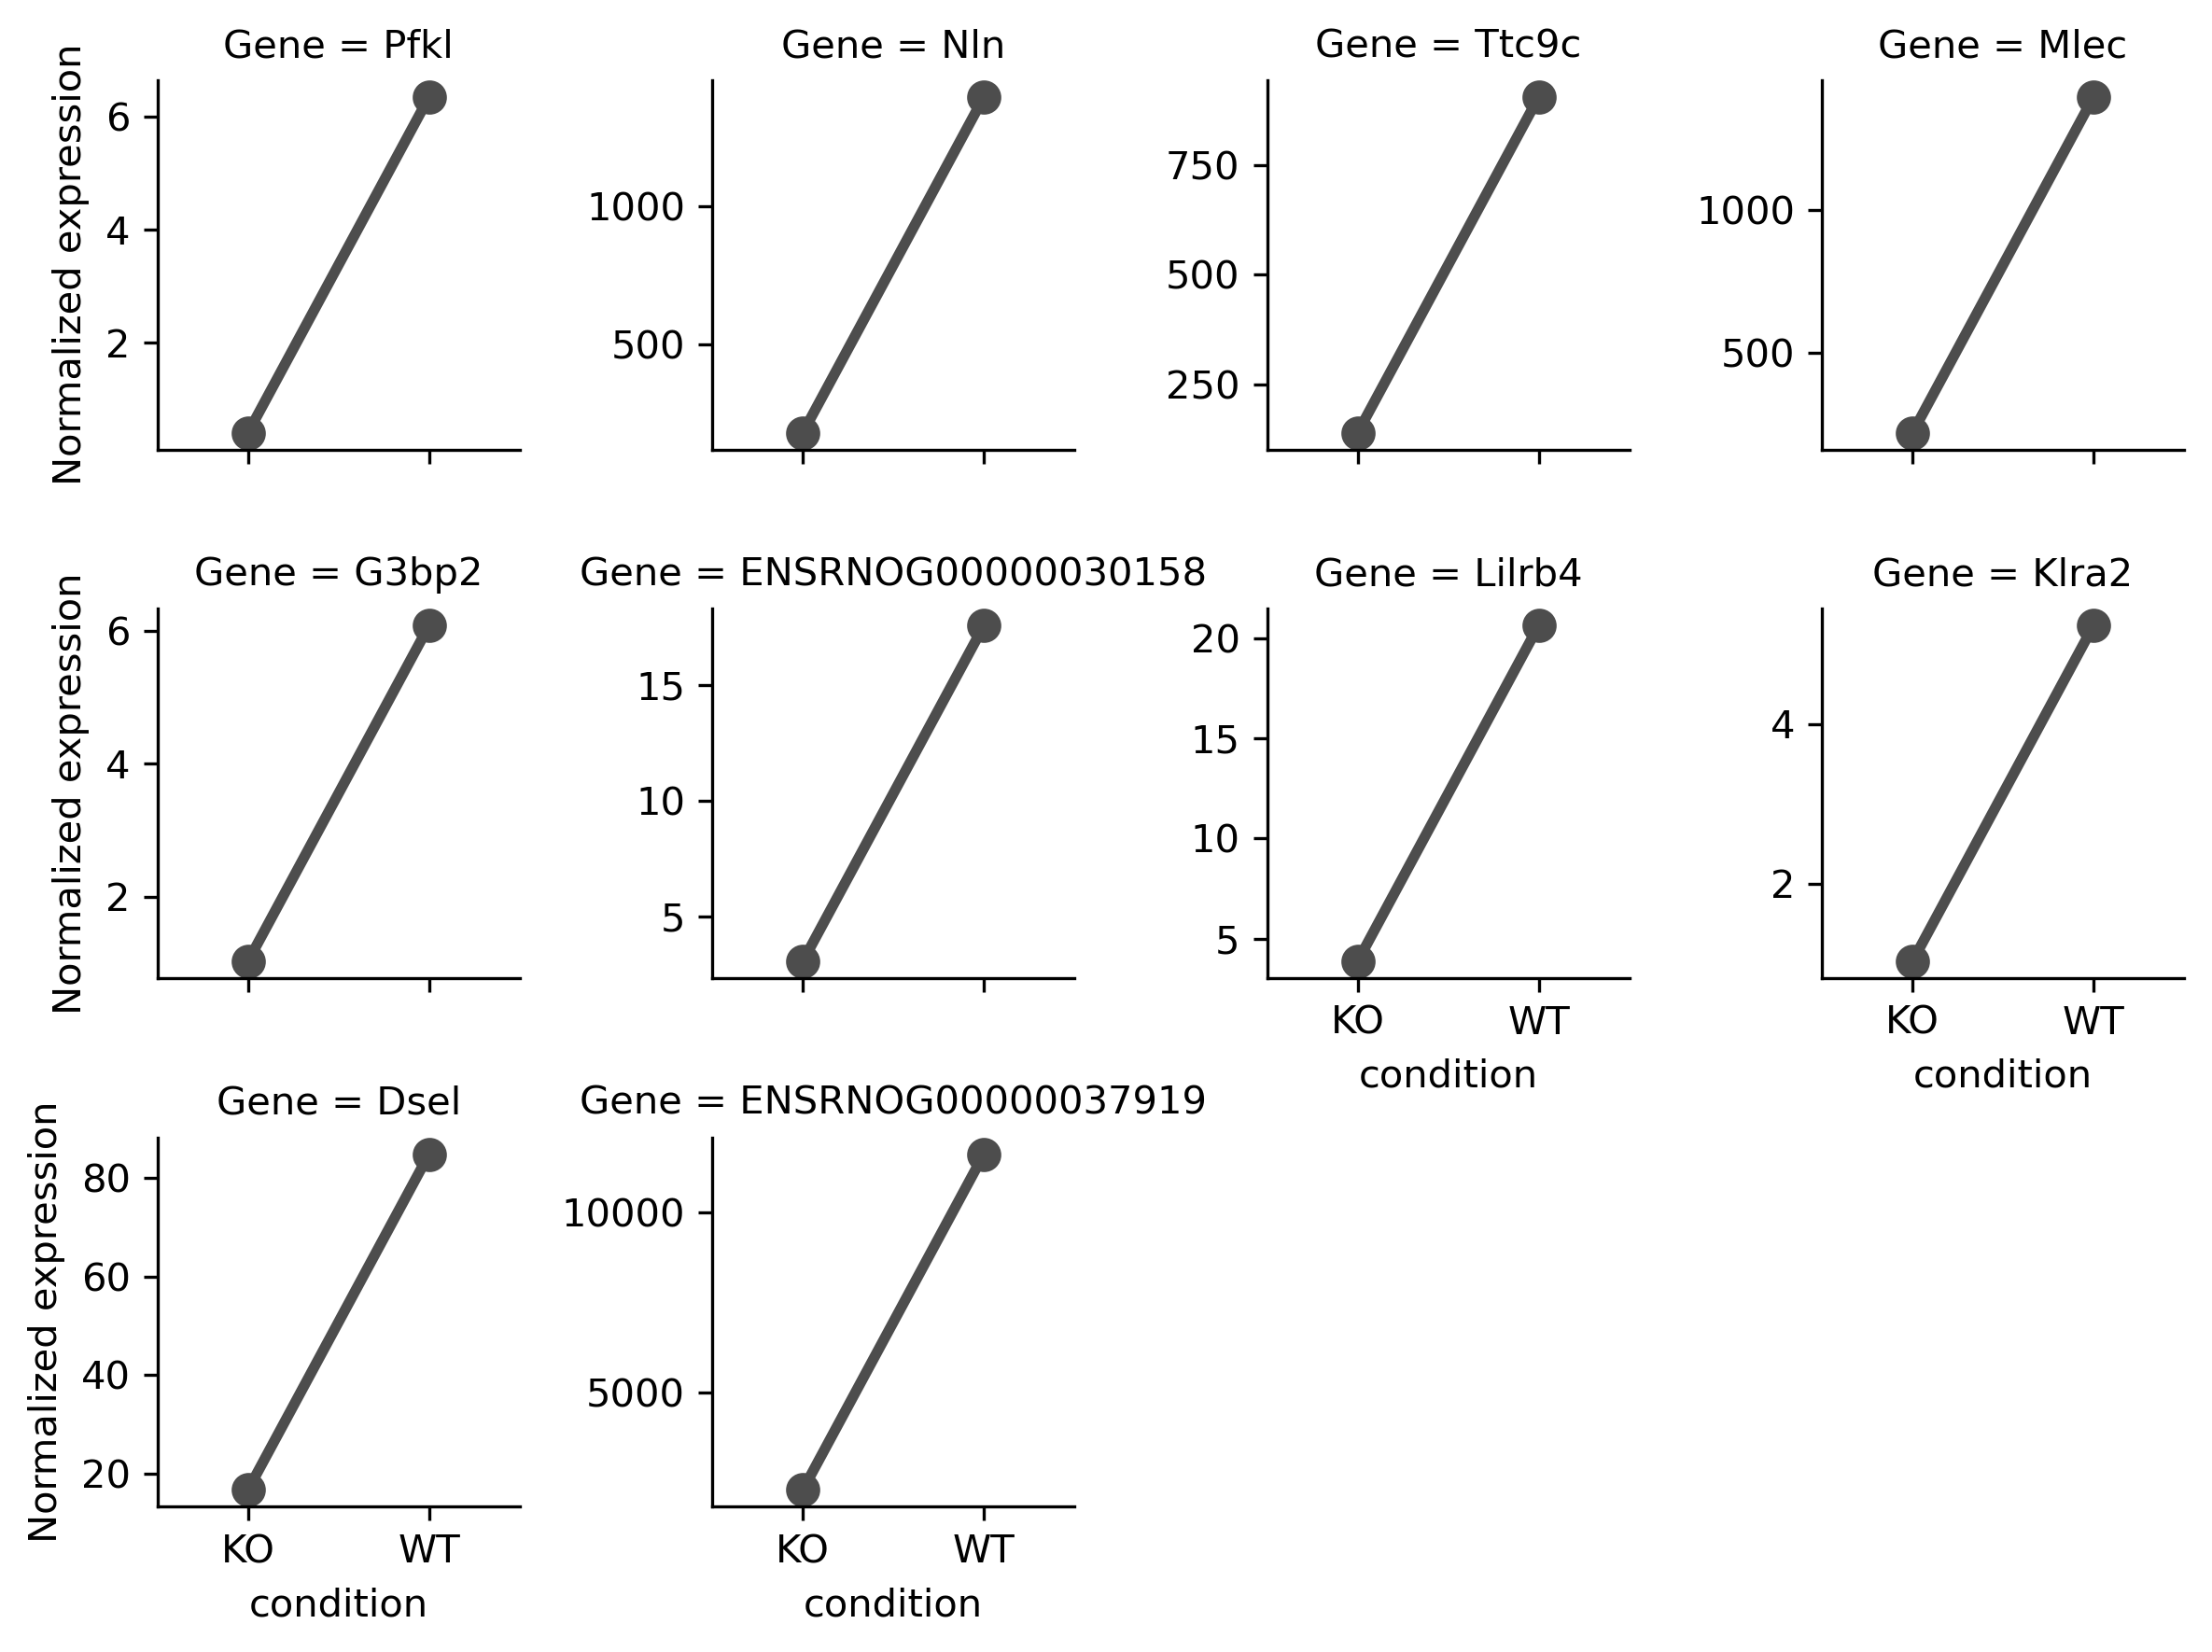

In [52]:
g = sns.FacetGrid(topDown, col="Gene", col_wrap=4, height=2, sharey=False)
g.map(sns.pointplot, "condition", "Normalized expression", order=['KO', 'WT'], color=".3", errorbar=None)

For upregulated genes, we can do the same.

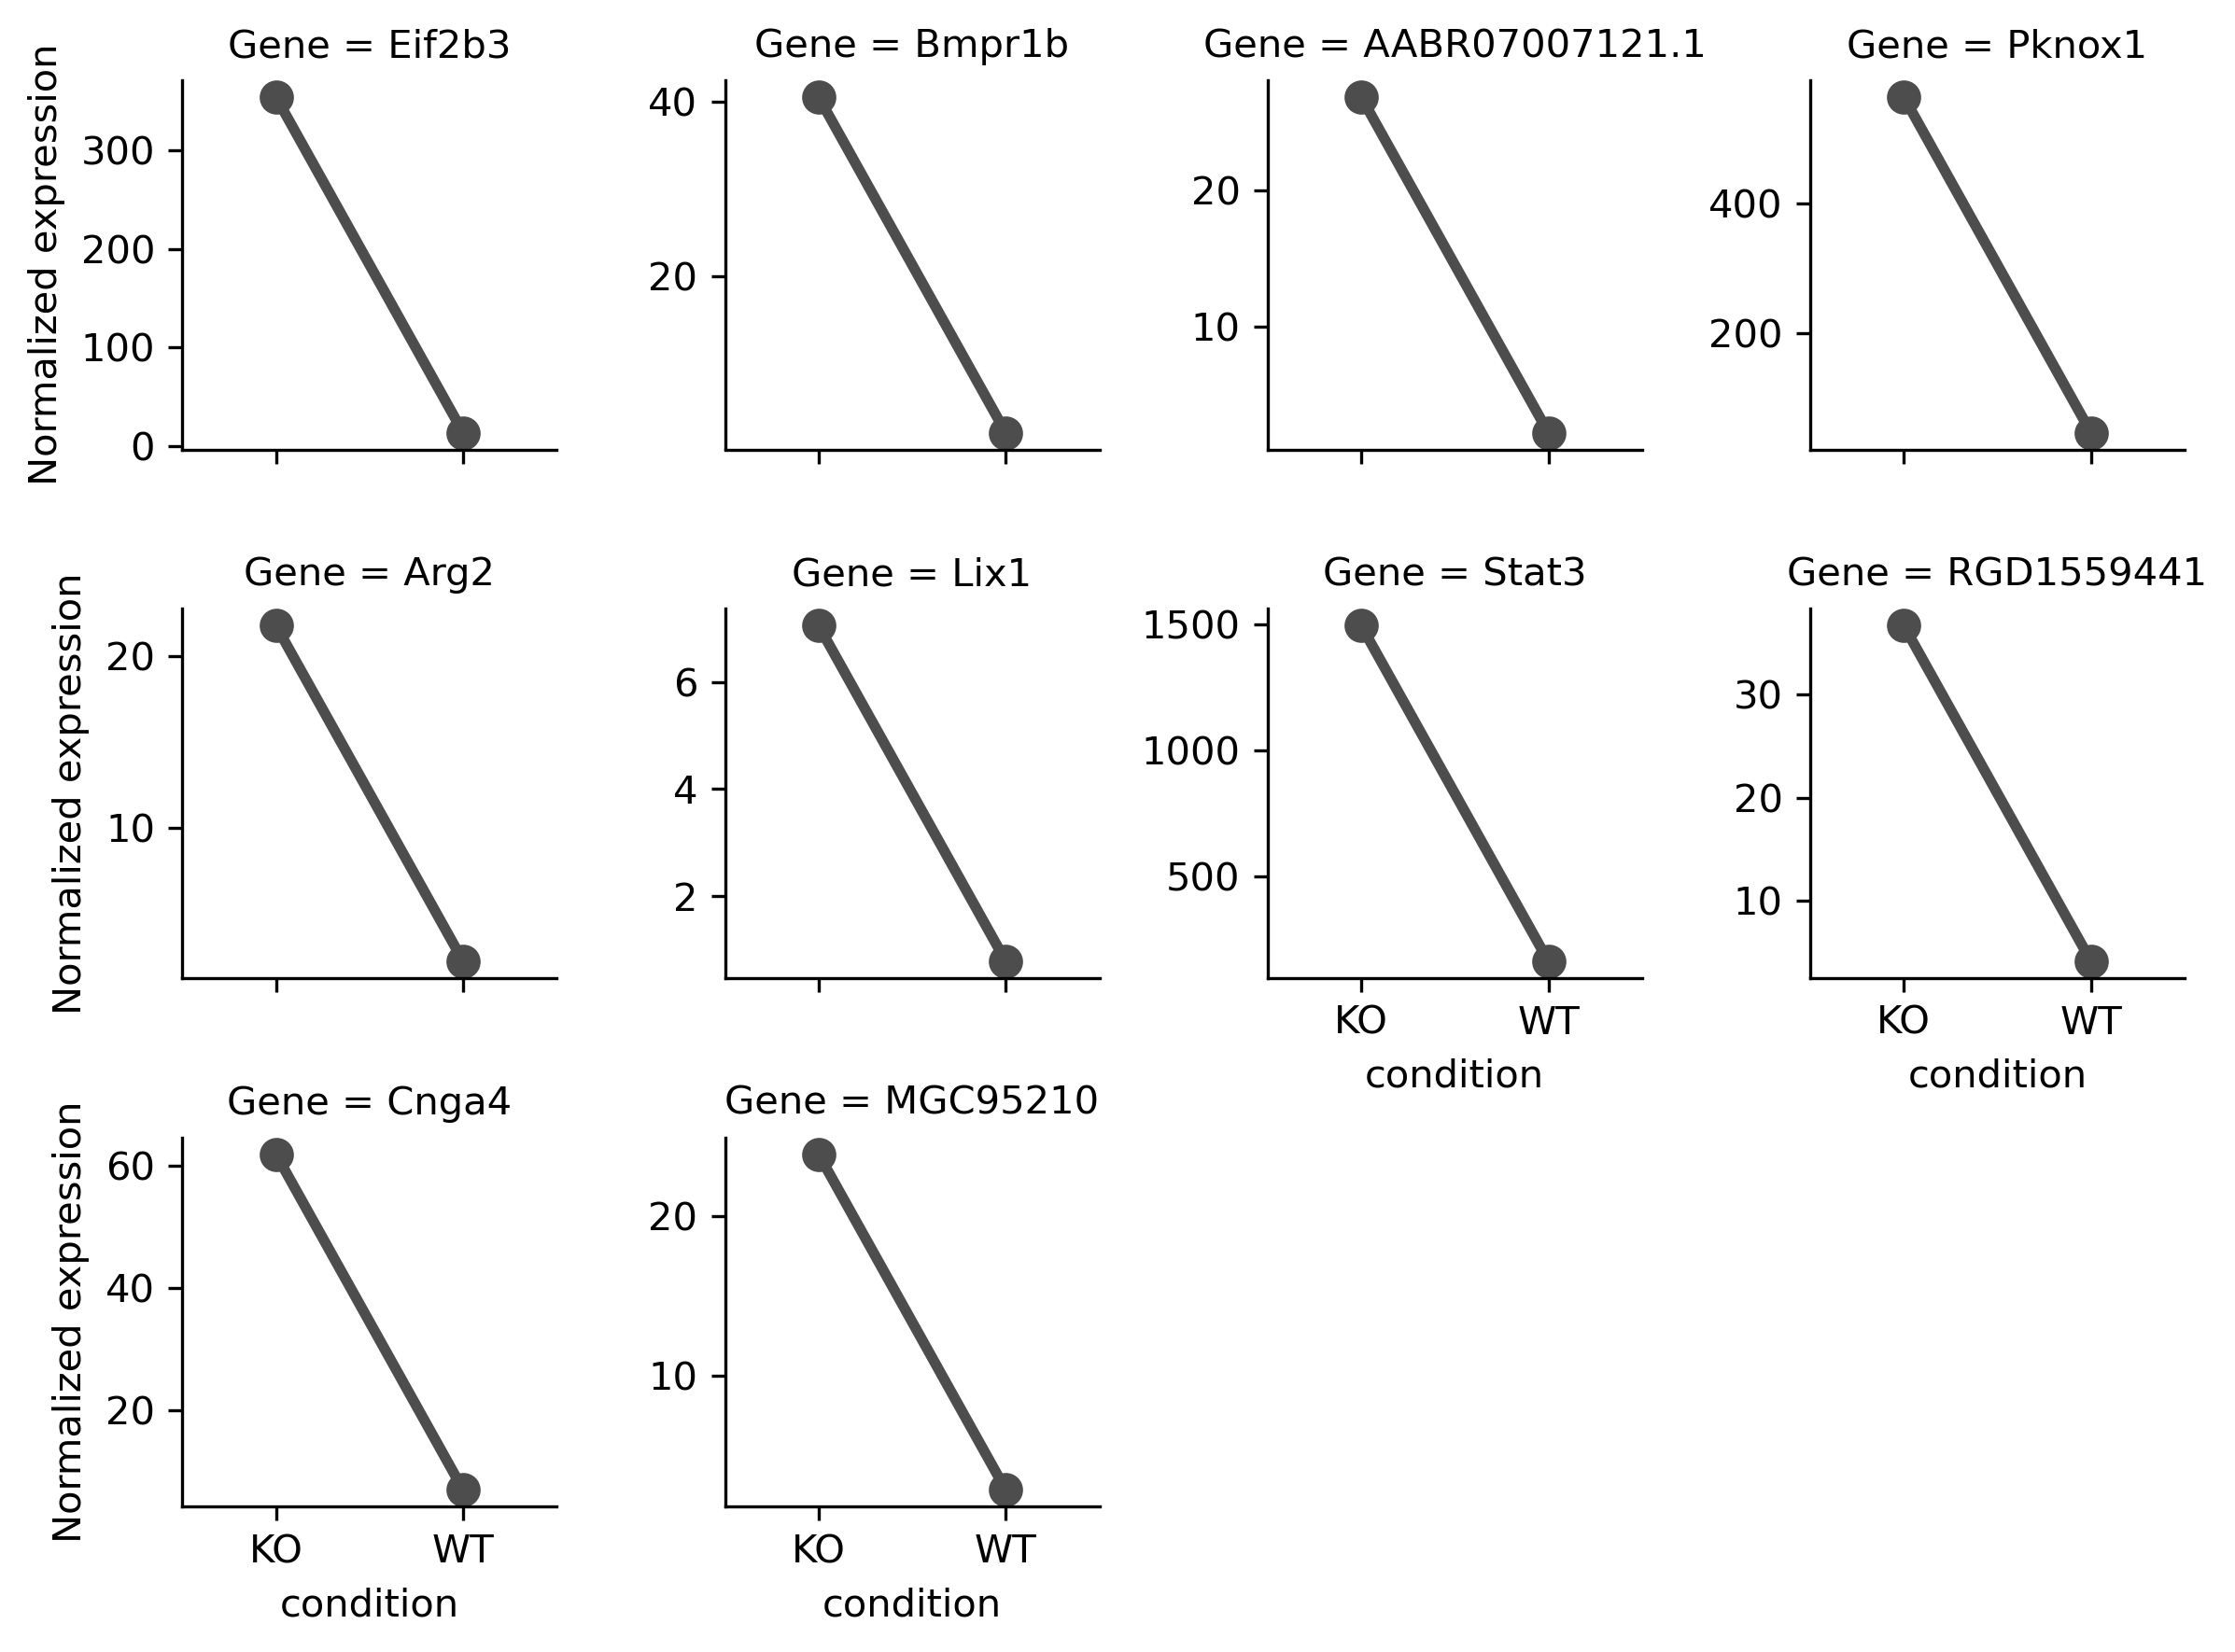

In [53]:
g = sns.FacetGrid(topUp, col="Gene", col_wrap=4, height=2, sharey=False)
g.map(sns.pointplot, "condition", "Normalized expression", order=['KO', 'WT'], color=".3", errorbar=None)

If you prefer visualizing expression for each replicate, you can use `regplot` instead.

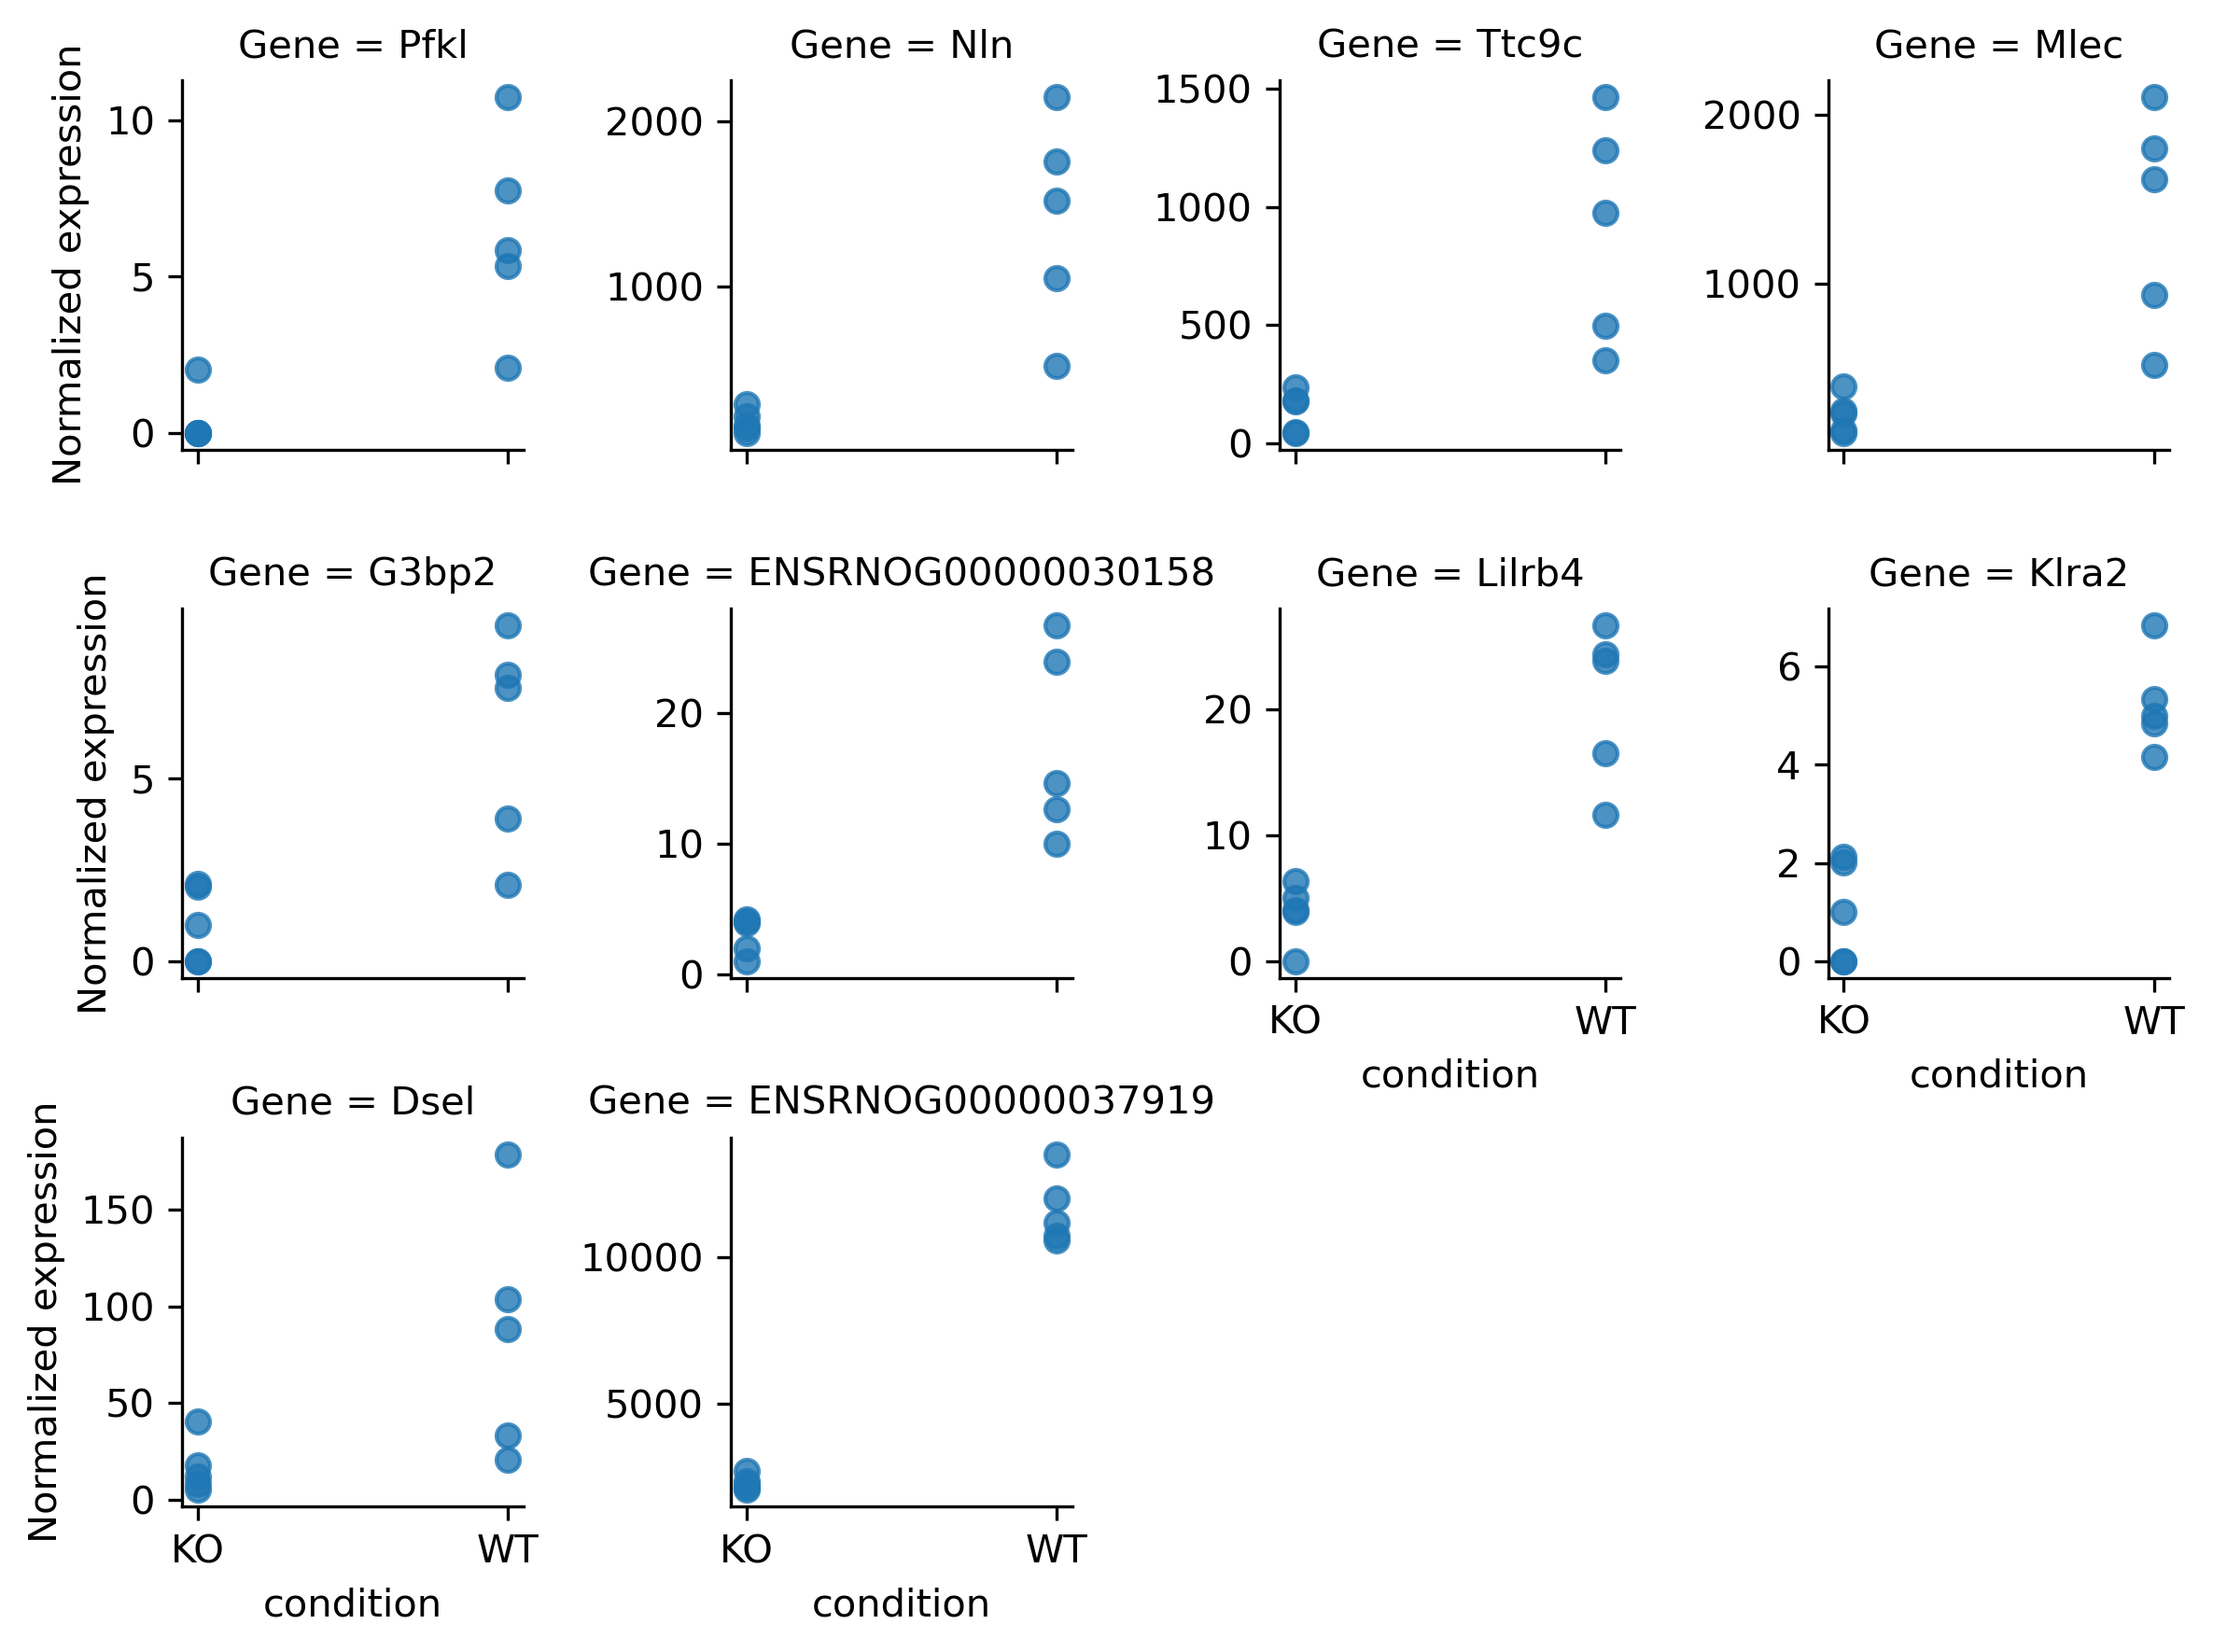

In [54]:
g = sns.FacetGrid(topDown, col="Gene", col_wrap=4, height=2, sharey=False)
g.map(sns.regplot, 'condition', 'Normalized expression', fit_reg=False)

Other plots can be generated as well, but we will stop here and save the plots.

down-regulated

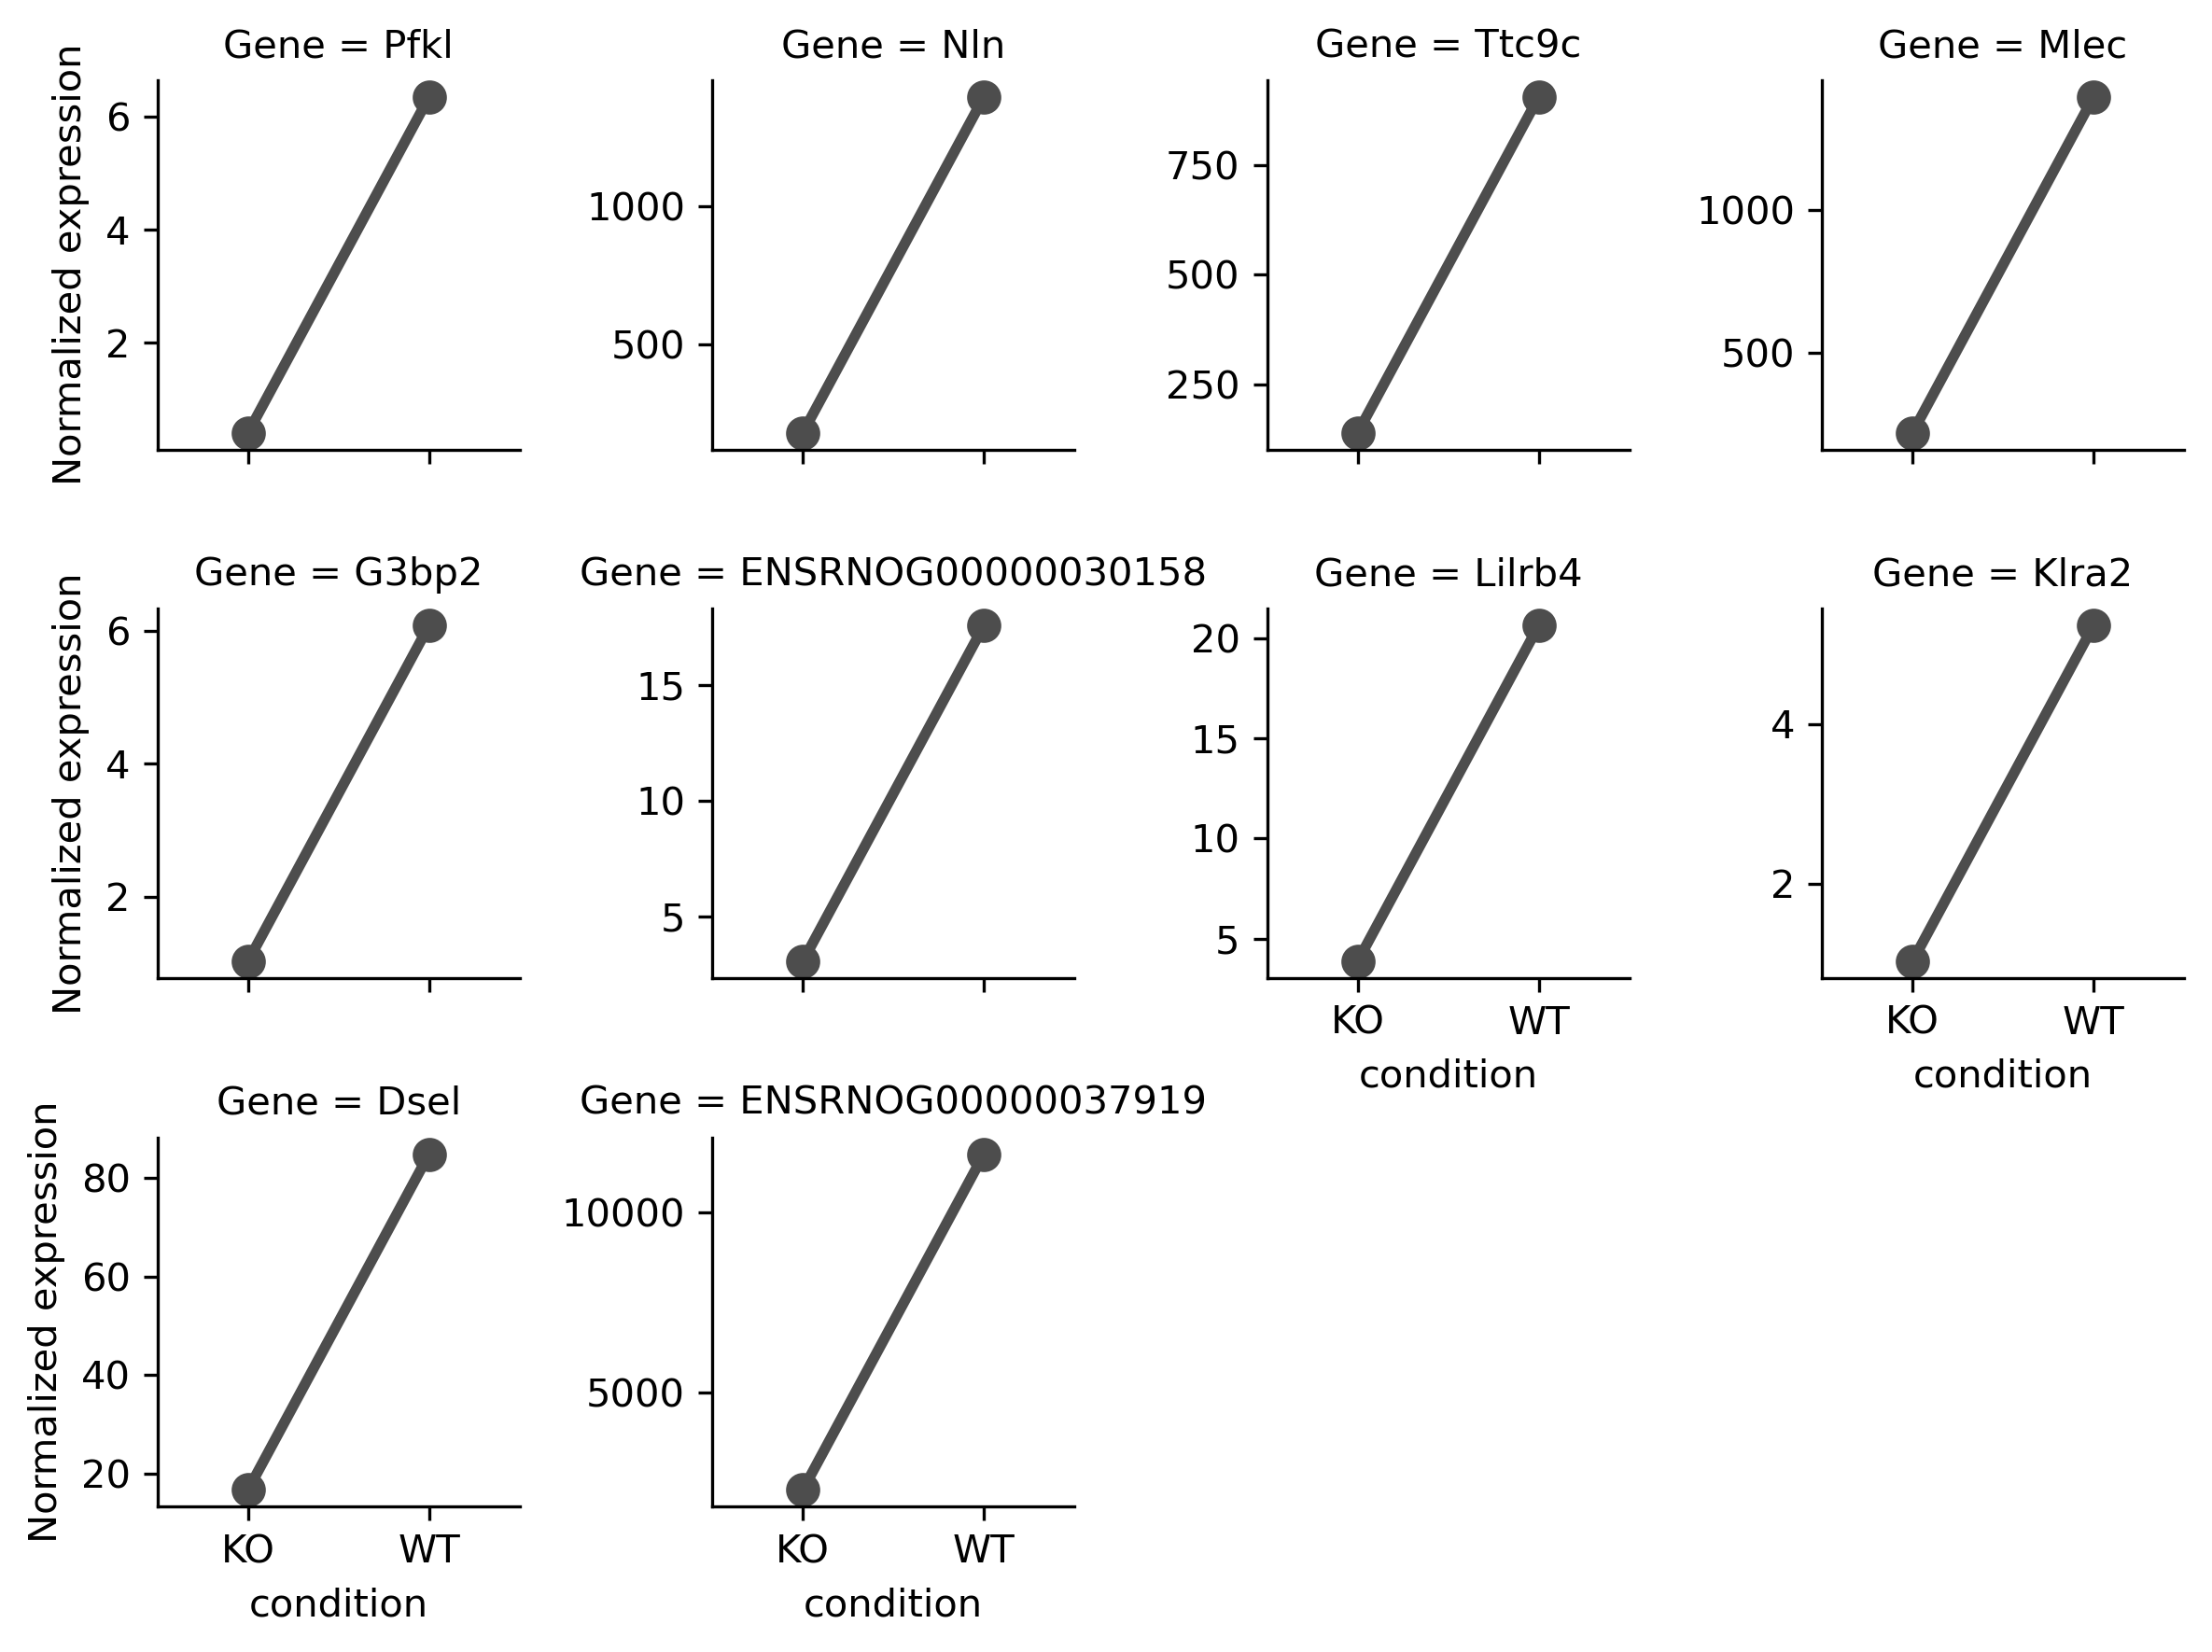

In [55]:
g = sns.FacetGrid(topDown, col="Gene", col_wrap=4, height=2, sharey=False)
g.map(sns.pointplot, "condition", "Normalized expression", order=['KO', 'WT'], color=".3", errorbar=None)
g.savefig('gene_expression_downregulated.png')

up-regulated

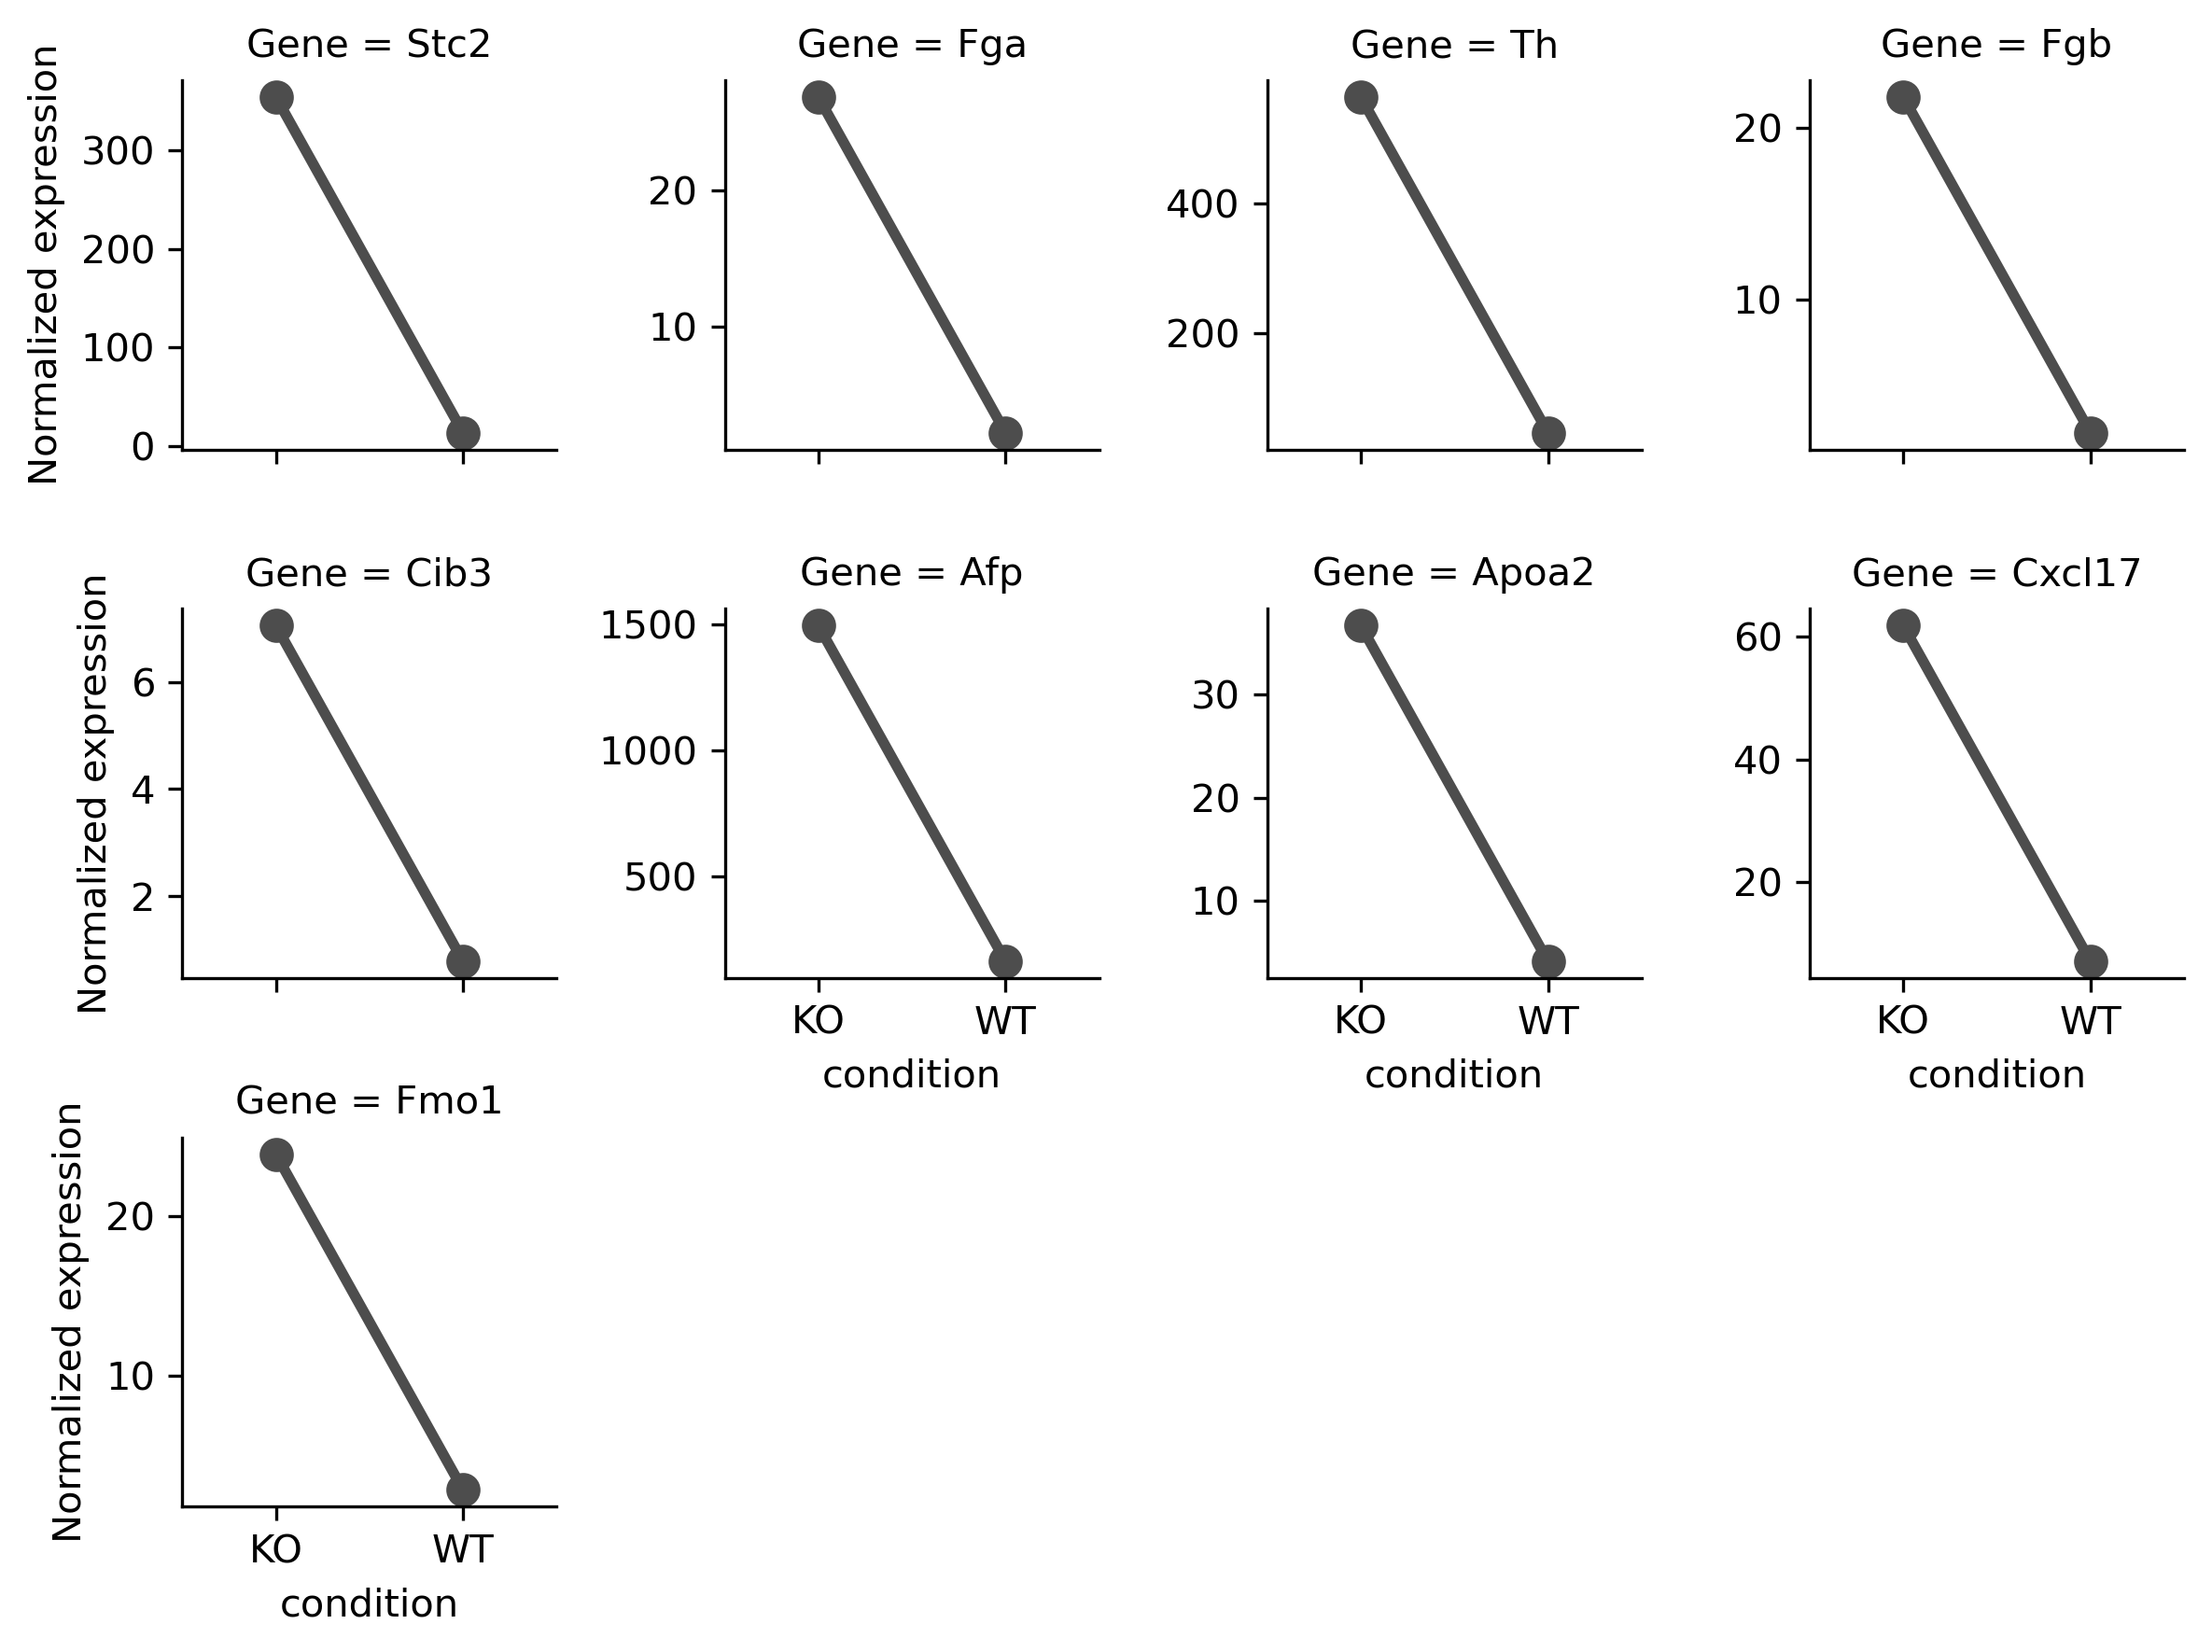

In [44]:
g = sns.FacetGrid(topUp, col="Gene", col_wrap=4, height=2, sharey=False)
g.map(sns.pointplot, "condition", "Normalized expression", order=['KO', 'WT'], color=".3", errorbar=None)
g.savefig('gene_expression_upregulated.png')